    Thi Thu Trang Nguyen
    Student ID: 104255969
    Email: 104255969@student.swin.edu.au 

# Assignment 2: Data visualisation using Python

**Scenario:** 
Canopy is a boutique streaming service that plans to cater to viewers of French-language movies. Their streaming services include:
* offer curated selections of best rated French-language movies from the existing content
* make French-language movies available to various age groups
* identify **the least tapped genres** so as to provide the filmmakers with data to make original content for Canopy.

As the data analyst for Canopy. My key responsibilities include:

* interpreting data, analysing results using the statistical techniques you learned throughout the course.
* helping gather insights and understand trends to make decisions by conducting data analysis using python.
* deducing results that Canopy can use to inform their business goals.

**Step 4:** Create your analysis and visualisation
Your tasks may not be limited to what is laid out in the list here. You might choose to implement more functions so as to come to some concrete conclusions for Canopy. Make sure you make use of the **Matplotlib**, **Seaborn**, and **visualisation libraries (e.g. Bokeh)** for all your tasks.

Canopy wants to find solutions to some broader business problems. Use this set of questions to create your visualisations.

**Question 1.** Does France make longer movies on average based on the runtime?

**Question 2.**. Does France make better movies on average based on the ratings?

**Question 3.**. Are there any French movies that claim to be of more than one genre? (For eg: Avengers Infinity War is an adventure movie but not comedy, whereas Back to The Future is both.)

[Note: Canopy doesn’t mind if you choose to include the French dubbed movies, at this stage.]

### Import Necessary Libraries

In [1]:
# Import neccessary packages including Panda, NumPy, Matplotlib, Seaborn
import pandas as pd
import numpy as np

In [2]:
# Set the maximum rows and columns for this pipeline
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

### Load the data

In [3]:
df = pd.read_csv('20220525_movieds.csv')
df.head()

Title  Year  Age  IMDb  \
0                                       Trigger Pals  1939  NaN   5.3   
1         One Way Astronaut: The Mars One Initiative  2017  NaN   NaN   
2                                         Open Grave  2013  18+   6.2   
3  Metallica: Kill 'Em All to St. Anger - The Ult...  2006  NaN   NaN   
4                                    Beyond the Pale  2014  NaN   7.4   

  Rotten Tomatoes              Directors                    Genres  \
0             NaN           Sam Newfield  Action,Adventure,Western   
1             NaN                    NaN                       NaN   
2             18%  Gonzalo López-Gallego   Horror,Mystery,Thriller   
3             NaN                    NaN                       NaN   
4             NaN            Ja-Ann Wang               Short,Drama   

                 Country Language  Runtime  
0          United States  English     59.0  
1                    NaN      NaN      NaN  
2  United States,Hungary  English    102.0  
3                    NaN      NaN      NaN  
4          United States  English     11.0

## Cleaning data

#### Convert columns to the correct types

In [4]:
df.info() # Check the general info of the df including each column type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15069 entries, 0 to 15068
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            15069 non-null  object 
 1   Year             15069 non-null  int64  
 2   Age              6609 non-null   object 
 3   IMDb             14543 non-null  float64
 4   Rotten Tomatoes  4636 non-null   object 
 5   Directors        14396 non-null  object 
 6   Genres           14814 non-null  object 
 7   Country          14672 non-null  object 
 8   Language         14521 non-null  object 
 9   Runtime          14533 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 1.1+ MB


In [5]:
# check types of columns
df.dtypes

Title               object
Year                 int64
Age                 object
IMDb               float64
Rotten Tomatoes     object
Directors           object
Genres              object
Country             object
Language            object
Runtime            float64
dtype: object

In [6]:
# Cast data type for columns IMDb and Rotten Tomatoes to float type
df['IMDb'].astype(float)
df['Rotten Tomatoes'] = df['Rotten Tomatoes'].str.rstrip('%').astype(float)/100.0
#                                             ^ use str funcs to elim '%'  ^ divide by 100

# Cast data type for columns Year into integer
df['Year'].astype(int)


0        1939
1        2017
2        2013
3        2006
4        2014
         ... 
15064    2019
15065    1993
15066    2015
15067    2018
15068    2013
Name: Year, Length: 15069, dtype: int32

In [7]:
# check types of all colums, results show IMDb and Rotten Tomatoes score are in float type
df.dtypes

Title               object
Year                 int64
Age                 object
IMDb               float64
Rotten Tomatoes    float64
Directors           object
Genres              object
Country             object
Language            object
Runtime            float64
dtype: object

### Handling missing values

* Drop rows that have missing values in all columns.
* Drop rows that have missing values in both columns 'IMDb' and 'Rotten Tomatoes'. We cannot analyse the ratings without either of them.
* Drop rows that have missing values in the following columns: Genres, Country, Runtime

In [8]:
# Check missing values in all columns and display the columns with missing values
df.isnull().sum().sort_values(ascending =False)

Rotten Tomatoes    10433
Age                 8460
Directors            673
Language             548
Runtime              536
IMDb                 526
Country              397
Genres               255
Title                  0
Year                   0
dtype: int64

In [9]:
# Drop rows that have missing values in all columns
df.dropna(axis='index', how='all', inplace=True)

# Drop columns that have all missing values
df.dropna(axis='columns', how='all', inplace=True)

# Drop rows that have missing values in both IMDb and Rotten Tomatoes
# We cannot analyse a movie without the information of either an IMDb or Rottent Tomatoes scores
df.dropna(axis = 'index', how = 'all', subset = ['IMDb','Rotten Tomatoes'], inplace=True)

# Drop rows that have missing values in Genres, Country, and Runtime 
df.dropna(axis = 'index', how = 'any', subset = ['Genres', 'Country', 'Runtime'], inplace=True)

df

Title  Year  Age  IMDb  Rotten Tomatoes  \
0                Trigger Pals  1939  NaN   5.3              NaN   
2                  Open Grave  2013  18+   6.2             0.18   
4             Beyond the Pale  2014  NaN   7.4              NaN   
5                 White Tiger  1996  13+   5.0              NaN   
6                 Path to War  2002  16+   7.3              NaN   
...                       ...   ...  ...   ...              ...   
15064            Holiday Rush  2019   7+   4.8              NaN   
15065          Demolition Man  1993  18+   6.7             0.59   
15066  Düğün Dernek 2: Sünnet  2015  13+   6.4              NaN   
15067             Fanney Khan  2018  NaN   4.5             0.63   
15068               Off Label  2013  NaN   5.2             0.50   

                           Directors                        Genres  \
0                       Sam Newfield      Action,Adventure,Western   
2              Gonzalo López-Gallego       Horror,Mystery,Thriller   
4                        Ja-Ann Wang                   Short,Drama   
5                 Karen Shakhnazarov  Action,Adventure,Fantasy,War   
6                 John Frankenheimer           Biography,Drama,War   
...                              ...                           ...   
15064                   Leslie Small                Comedy,Romance   
15065                Marco Brambilla        Action,Sci-Fi,Thriller   
15066                 Selçuk Aydemir                        Comedy   
15067                 Atul Manjrekar            Comedy,Drama,Music   
15068  Donal Mosher,Michael Palmieri     Documentary,Drama,History   

                     Country        Language  Runtime  
0              United States         English     59.0  
2      United States,Hungary         English    102.0  
4              United States         English     11.0  
5                     Russia  Russian,German    104.0  
6              United States         English    165.0  
...                      ...             ...      ...  
15064          United States         English     92.0  
15065          United States         English    115.0  
15066                 Turkey         Turkish    112.0  
15067                  India             NaN    130.0  
15068          United States         English     80.0  

[14115 rows x 10 columns]

In [10]:
# Find NAN
nan_df = df[df.isna().any(axis=1)]
display(nan_df.head())


Title  Year  Age  IMDb  Rotten Tomatoes           Directors  \
0     Trigger Pals  1939  NaN   5.3              NaN        Sam Newfield   
4  Beyond the Pale  2014  NaN   7.4              NaN         Ja-Ann Wang   
5      White Tiger  1996  13+   5.0              NaN  Karen Shakhnazarov   
6      Path to War  2002  16+   7.3              NaN  John Frankenheimer   
7        Manderlay  2005  NaN   7.3              0.5      Lars von Trier   

                         Genres  \
0      Action,Adventure,Western   
4                   Short,Drama   
5  Action,Adventure,Fantasy,War   
6           Biography,Drama,War   
7                         Drama   

                                             Country        Language  Runtime  
0                                      United States         English     59.0  
4                                      United States         English     11.0  
5                                             Russia  Russian,German    104.0  
6                                      United States         English    165.0  
7  Denmark,Sweden,Netherlands,France,Germany,Unit...         English    139.0

In [11]:
df.describe(include='all')

Title          Year   Age          IMDb  Rotten Tomatoes  \
count          14115  14115.000000  6462  14113.000000      4593.000000   
unique         14115           NaN     5           NaN              NaN   
top     Trigger Pals           NaN   18+           NaN              NaN   
freq               1           NaN  3082           NaN              NaN   
mean             NaN   2002.526461   NaN      5.902912         0.653595   
std              NaN     20.933424   NaN      1.345280         0.266545   
min              NaN   1913.000000   NaN      0.000000         0.020000   
25%              NaN   1999.000000   NaN      5.100000         0.440000   
50%              NaN   2011.000000   NaN      6.100000         0.710000   
75%              NaN   2016.000000   NaN      6.900000         0.880000   
max              NaN   2020.000000   NaN      9.300000         1.000000   

          Directors Genres        Country Language       Runtime  
count         13828  14115          14115    13966  14115.000000  
unique         9989   1747           1178      999           NaN  
top     Jay Chapman  Drama  United States  English           NaN  
freq             34   1139           7590     9474           NaN  
mean            NaN    NaN            NaN      NaN     93.930429  
std             NaN    NaN            NaN      NaN     28.055167  
min             NaN    NaN            NaN      NaN      1.000000  
25%             NaN    NaN            NaN      NaN     83.000000  
50%             NaN    NaN            NaN      NaN     92.000000  
75%             NaN    NaN            NaN      NaN    104.000000  
max             NaN    NaN            NaN      NaN   1256.000000

In [12]:
# Check total missing values
df.isnull().sum().sort_values(ascending =False)

Rotten Tomatoes    9522
Age                7653
Directors           287
Language            149
IMDb                  2
Title                 0
Year                  0
Genres                0
Country               0
Runtime               0
dtype: int64

## Transforming data

In [13]:
df # original dataset after removing missing values and cast correct types for columns

Title  Year  Age  IMDb  Rotten Tomatoes  \
0                Trigger Pals  1939  NaN   5.3              NaN   
2                  Open Grave  2013  18+   6.2             0.18   
4             Beyond the Pale  2014  NaN   7.4              NaN   
5                 White Tiger  1996  13+   5.0              NaN   
6                 Path to War  2002  16+   7.3              NaN   
...                       ...   ...  ...   ...              ...   
15064            Holiday Rush  2019   7+   4.8              NaN   
15065          Demolition Man  1993  18+   6.7             0.59   
15066  Düğün Dernek 2: Sünnet  2015  13+   6.4              NaN   
15067             Fanney Khan  2018  NaN   4.5             0.63   
15068               Off Label  2013  NaN   5.2             0.50   

                           Directors                        Genres  \
0                       Sam Newfield      Action,Adventure,Western   
2              Gonzalo López-Gallego       Horror,Mystery,Thriller   
4                        Ja-Ann Wang                   Short,Drama   
5                 Karen Shakhnazarov  Action,Adventure,Fantasy,War   
6                 John Frankenheimer           Biography,Drama,War   
...                              ...                           ...   
15064                   Leslie Small                Comedy,Romance   
15065                Marco Brambilla        Action,Sci-Fi,Thriller   
15066                 Selçuk Aydemir                        Comedy   
15067                 Atul Manjrekar            Comedy,Drama,Music   
15068  Donal Mosher,Michael Palmieri     Documentary,Drama,History   

                     Country        Language  Runtime  
0              United States         English     59.0  
2      United States,Hungary         English    102.0  
4              United States         English     11.0  
5                     Russia  Russian,German    104.0  
6              United States         English    165.0  
...                      ...             ...      ...  
15064          United States         English     92.0  
15065          United States         English    115.0  
15066                 Turkey         Turkish    112.0  
15067                  India             NaN    130.0  
15068          United States         English     80.0  

[14115 rows x 10 columns]

In [14]:
# check the general infomation of the data

df.describe(include='all')

df[df['Runtime'] == 'NaN'].count()

Title              0
Year               0
Age                0
IMDb               0
Rotten Tomatoes    0
Directors          0
Genres             0
Country            0
Language           0
Runtime            0
dtype: int64

#### Plot histogram of columns for numerical variables

(array([  26.,  133.,  414.,  294.,  359.,  646.,  644.,  897., 2646.,
        8056.]),
 array([1913. , 1923.7, 1934.4, 1945.1, 1955.8, 1966.5, 1977.2, 1987.9,
        1998.6, 2009.3, 2020. ]),
 <BarContainer object of 10 artists>)

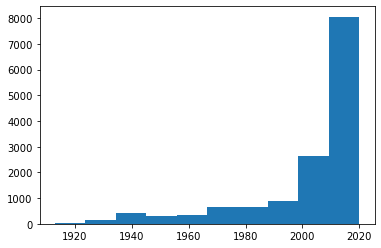

In [15]:
import matplotlib.pyplot as plt
plt.hist(df['Year'])

<AxesSubplot:>

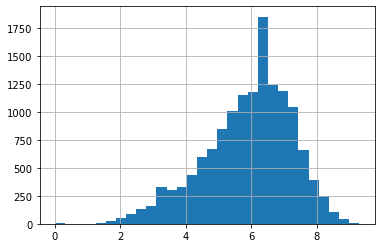

In [16]:
#plt.hist(df['IMDb'])

df['IMDb'].hist(bins=30)

(array([121., 289., 266., 363., 370., 383., 448., 631., 805., 917.]),
 array([0.02 , 0.118, 0.216, 0.314, 0.412, 0.51 , 0.608, 0.706, 0.804,
        0.902, 1.   ]),
 <BarContainer object of 10 artists>)

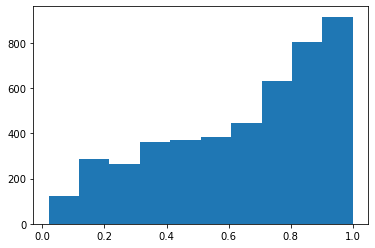

In [17]:
plt.hist(df['Rotten Tomatoes'])

##### The histogram shows number of movies by year, IMDb and Rotten Tomatoes scores all look normal.

(array([3.67e+02, 3.54e+03, 9.06e+03, 9.88e+02, 1.37e+02, 1.20e+01,
        5.00e+00, 2.00e+00, 2.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00]),
 array([1.00000000e+00, 4.28333333e+01, 8.46666667e+01, 1.26500000e+02,
        1.68333333e+02, 2.10166667e+02, 2.52000000e+02, 2.93833333e+02,
        3.35666667e+02, 3.77500000e+02, 4.19333333e+02, 4.61166667e+02,
        5.03000000e+02, 5.44833333e+02, 5.86666667e+02, 6.28500000e+02,
        6.70333333e+02, 7.12166667e+02, 7.54000000e+02, 7.95833333e+02,
        8.37666667e+02, 8.79500000e+02, 9.21333333e+02, 9.63166667e+02,
        1.00500000e+03, 1.04683333e+03, 1.08866667e+03, 1.13050000e+03,
        1.17233333e+03, 1.21416667e+03, 1.25600000e+03]),
 <BarContainer object of 30 artists>)

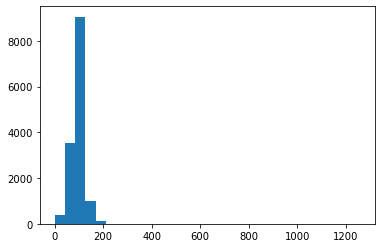

In [18]:
plt.hist(df['Runtime'], bins=30)

**The history of runtime does not look normal.  The below describe function on Runtime shows that there outliers with maximum values are very high.**

In [19]:
# Check the distribution in number using describe() function
df['Runtime'].describe()

count    14115.000000
mean        93.930429
std         28.055167
min          1.000000
25%         83.000000
50%         92.000000
75%        104.000000
max       1256.000000
Name: Runtime, dtype: float64

##### As the maximum values of runtime variable is unusually high. I will remove outliners that are smaller or greater than the mean -+ 3 deviations.
 Please note this technique of removing outliners may not be used all the time but for instance, it would be good to remove outliners as the 75th quintile is far from the maximum value. 

In [20]:
# remove values that are larger than mean + three deviations. 
import numpy as np
from scipy import stats
df = df[(np.abs(stats.zscore(df['Runtime'])) < 3)]

<AxesSubplot:xlabel='Runtime', ylabel='Count'>

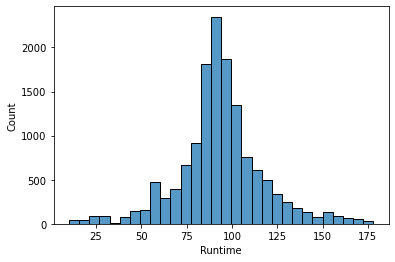

In [21]:
import seaborn as sns
sns.histplot(data=df, x='Runtime', bins=30)
# I use Seaborn to plot this variable but the equivalent way of doing it in matplotlib as follows
# plt.hist(df['Runtime'], bins=50)

<font color='red'> **All data looks good now. We can use the dataset df to do analysis.**

### Question 1: Does France make longer movies on average based on the runtime?

#### For movies that are released in France
Assuming that movies that are released in France are movies that are produced by France.

##### Create a subdataset 'movies_by_movies' from the main dataset df for this question

In [22]:
# Create new data frame which will contain separate country in each row
# Using pandas.DataFrame.explode function to break string seperated by a comma into an array
movies_by_country = pd.DataFrame(df['Country'].str.split(',').explode()) 
movies_by_country

Country
0      United States
2      United States
2            Hungary
4      United States
5             Russia
...              ...
15064  United States
15065  United States
15066         Turkey
15067          India
15068  United States

[17832 rows x 1 columns]

In [23]:
# loop through column 'Country' of the dataframe df, create columns for the data frame 'movies_by_country'
for col in df.columns: 
    if col=='Country':
        continue
    movies_by_country[col] = df.loc[movies_by_country.index, col]
movies_by_country

Country                   Title  Year  Age  IMDb  \
0      United States            Trigger Pals  1939  NaN   5.3   
2      United States              Open Grave  2013  18+   6.2   
2            Hungary              Open Grave  2013  18+   6.2   
4      United States         Beyond the Pale  2014  NaN   7.4   
5             Russia             White Tiger  1996  13+   5.0   
...              ...                     ...   ...  ...   ...   
15064  United States            Holiday Rush  2019   7+   4.8   
15065  United States          Demolition Man  1993  18+   6.7   
15066         Turkey  Düğün Dernek 2: Sünnet  2015  13+   6.4   
15067          India             Fanney Khan  2018  NaN   4.5   
15068  United States               Off Label  2013  NaN   5.2   

       Rotten Tomatoes                      Directors  \
0                  NaN                   Sam Newfield   
2                 0.18          Gonzalo López-Gallego   
2                 0.18          Gonzalo López-Gallego   
4                  NaN                    Ja-Ann Wang   
5                  NaN             Karen Shakhnazarov   
...                ...                            ...   
15064              NaN                   Leslie Small   
15065             0.59                Marco Brambilla   
15066              NaN                 Selçuk Aydemir   
15067             0.63                 Atul Manjrekar   
15068             0.50  Donal Mosher,Michael Palmieri   

                             Genres        Language  Runtime  
0          Action,Adventure,Western         English     59.0  
2           Horror,Mystery,Thriller         English    102.0  
2           Horror,Mystery,Thriller         English    102.0  
4                       Short,Drama         English     11.0  
5      Action,Adventure,Fantasy,War  Russian,German    104.0  
...                             ...             ...      ...  
15064                Comedy,Romance         English     92.0  
15065        Action,Sci-Fi,Thriller         English    115.0  
15066                        Comedy         Turkish    112.0  
15067            Comedy,Drama,Music             NaN    130.0  
15068     Documentary,Drama,History         English     80.0  

[17832 rows x 10 columns]

In [24]:
len(movies_by_country['Country'].unique()) # there are 161 countries in this dataset

161

In [25]:
avg_runtime = movies_by_country[['Country', 'Runtime']].groupby('Country').mean()

In [26]:
# average length of all movies
all_country_runtime = movies_by_country['Runtime'].mean()
all_country_runtime = round(all_country_runtime, 1)

In [27]:
# average length of French movies
france_runtime = avg_runtime[avg_runtime.index=='France']
france_runtime['Runtime']

Country
France    100.481424
Name: Runtime, dtype: float64

##### First, plot a histogram of average runtime group by country for all countries using matplotlib. I also use explanatory plot here with text to explain the runtime.

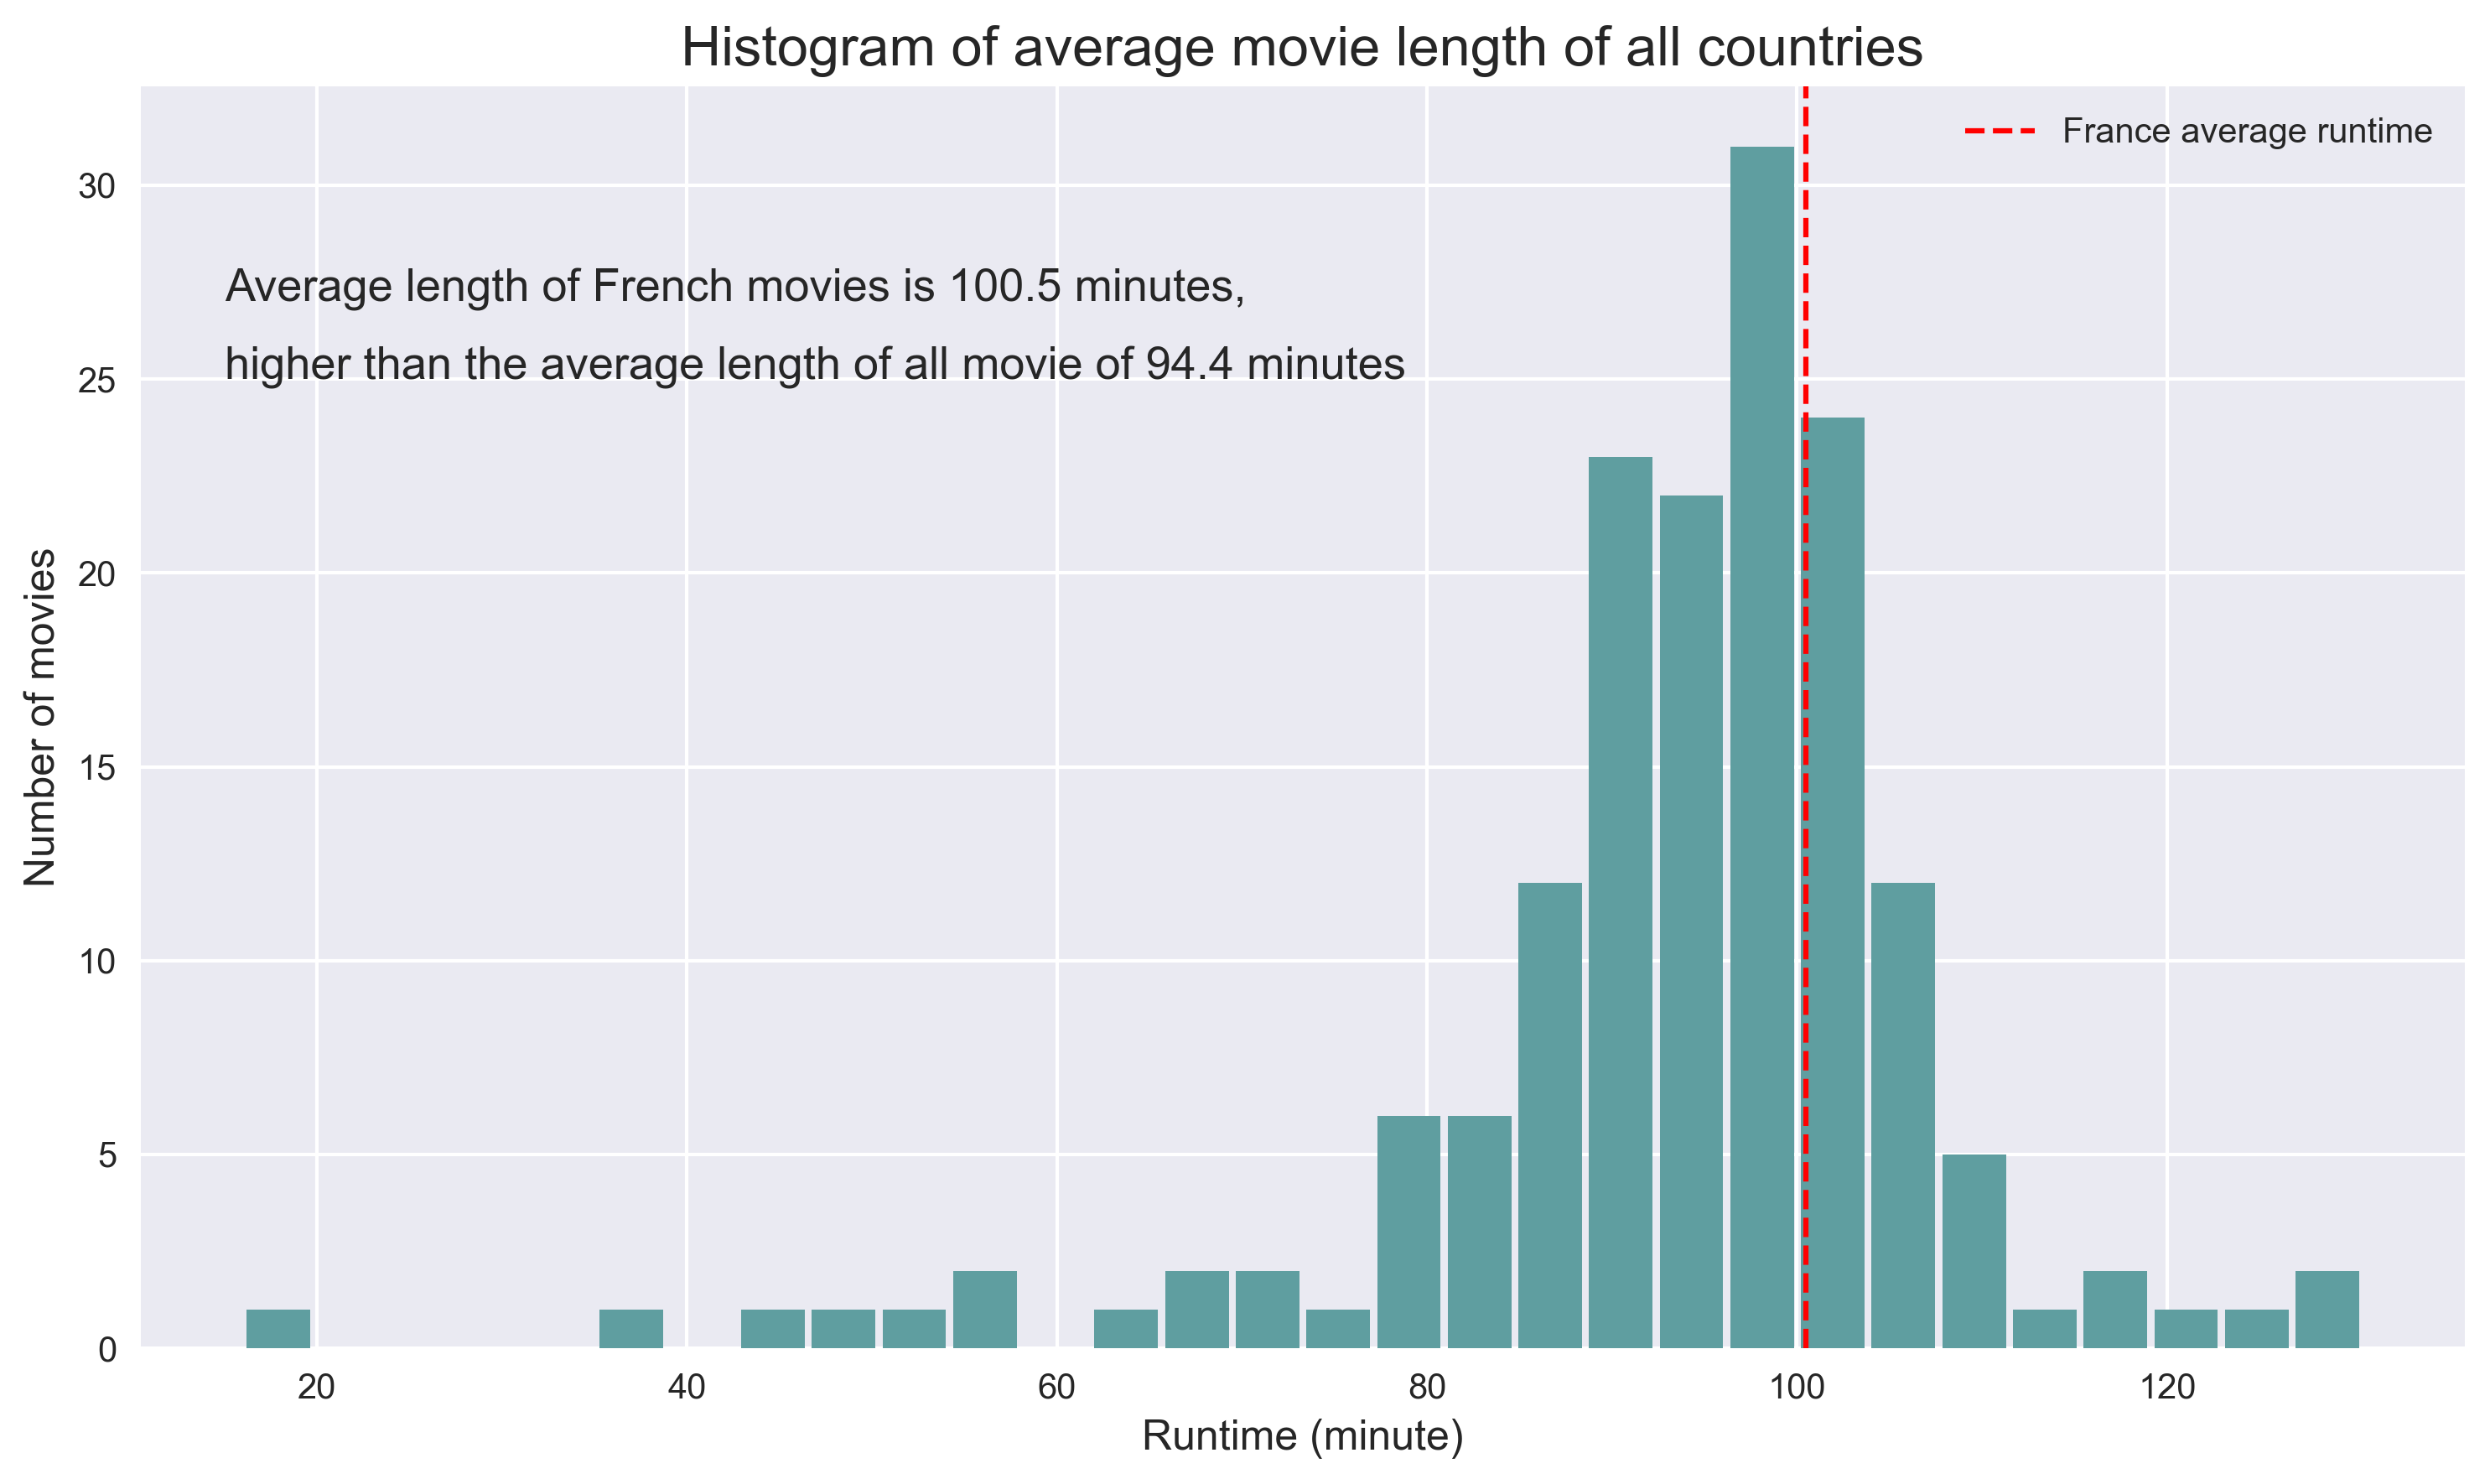

In [28]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300 # set the resolution for figures
plt.style.use('seaborn')

fig, ax = plt.subplots() #create a figure and an axe by calling the pyplot.subplots function usting the variables fig and ax
fig.set_size_inches(10, 6)

ax.hist(avg_runtime[('Runtime')], bins=30, rwidth=0.9, color='cadetblue') # plot the histogram with 30 bins
france_runtime_value = 100.5
ax.axvline(x=france_runtime_value, color='red', linestyle='--', linewidth=1.5, label='France average runtime')# plot the line for the France values

ax.set_xlabel('Runtime (minute)', size=12) 
ax.set_ylabel('Number of movies', size=12)
ax.set_title('Histogram of average movie length of all countries', size=16)

#adding text inside the plot
plt.text(15, 27, f'Average length of French movies is {france_runtime_value} minutes,', fontsize = 13)
plt.text(15, 25, f'higher than the average length of all movie of {all_country_runtime} minutes', fontsize=13)

plt.tight_layout()
plt.legend()
plt.show()

**Answer question 1:**

<font color='red'> **We can see that of 161 countries that all movies have been released in, France has movies in average longer than more than 100 countries, ranking at the 46th. The average runtime of movies made by France is 100.5 minutes/movie. The average runtime by country is 94.4 minutes/movie**

#### Second, visualising the average movie length of movies released in France compared to other countries

##### Now we will plot France's average runtime in comparision with other countries. We will plot a dashboard with three axes in one row.
The dashboard contain the top 10 countries with longest average movie length, 10 countries in the ranking of France, and bottom ten countries with shortest movie length.

In [29]:
# create a function that takes a dataframe of one column and return the top ten rows of highest values of that column
def top_ten(df):
    'Function that takes a groupby dataframe with one column'
    df_top_ten = df.apply(lambda x: x.sort_values(ascending=False).head(10))
    return df_top_ten

In [30]:
# create a function that takes a dataframe of one column and return the ten rows of lowest values of that column
def bottom_ten(df):
    'Function that takes a groupby dataframe object with one column'
    df_bottom_ten = df.apply(lambda x: x.sort_values(ascending=False).tail(10))
    return df_bottom_ten

In [31]:
def mid(df):
    'Function that takes a groupby dataframe object with one column'
    df_mid = df.apply(lambda x: x.sort_values(ascending=False)).iloc[40:51, :]
    return df_mid

C:\Users\a1777963\AppData\Local\Temp\ipykernel_30004\4275902778.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x1labels, rotation=45, ha='right', rotation_mode='anchor', size=11)
C:\Users\a1777963\AppData\Local\Temp\ipykernel_30004\4275902778.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(x2labels, rotation=45, ha='right', size=11, rotation_mode='anchor')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\a1777963\AppData\Local\Temp\ipykernel_30004\4275902778.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(x3labels, rotation=45, ha='right', size=11, rotation_mode='anchor')


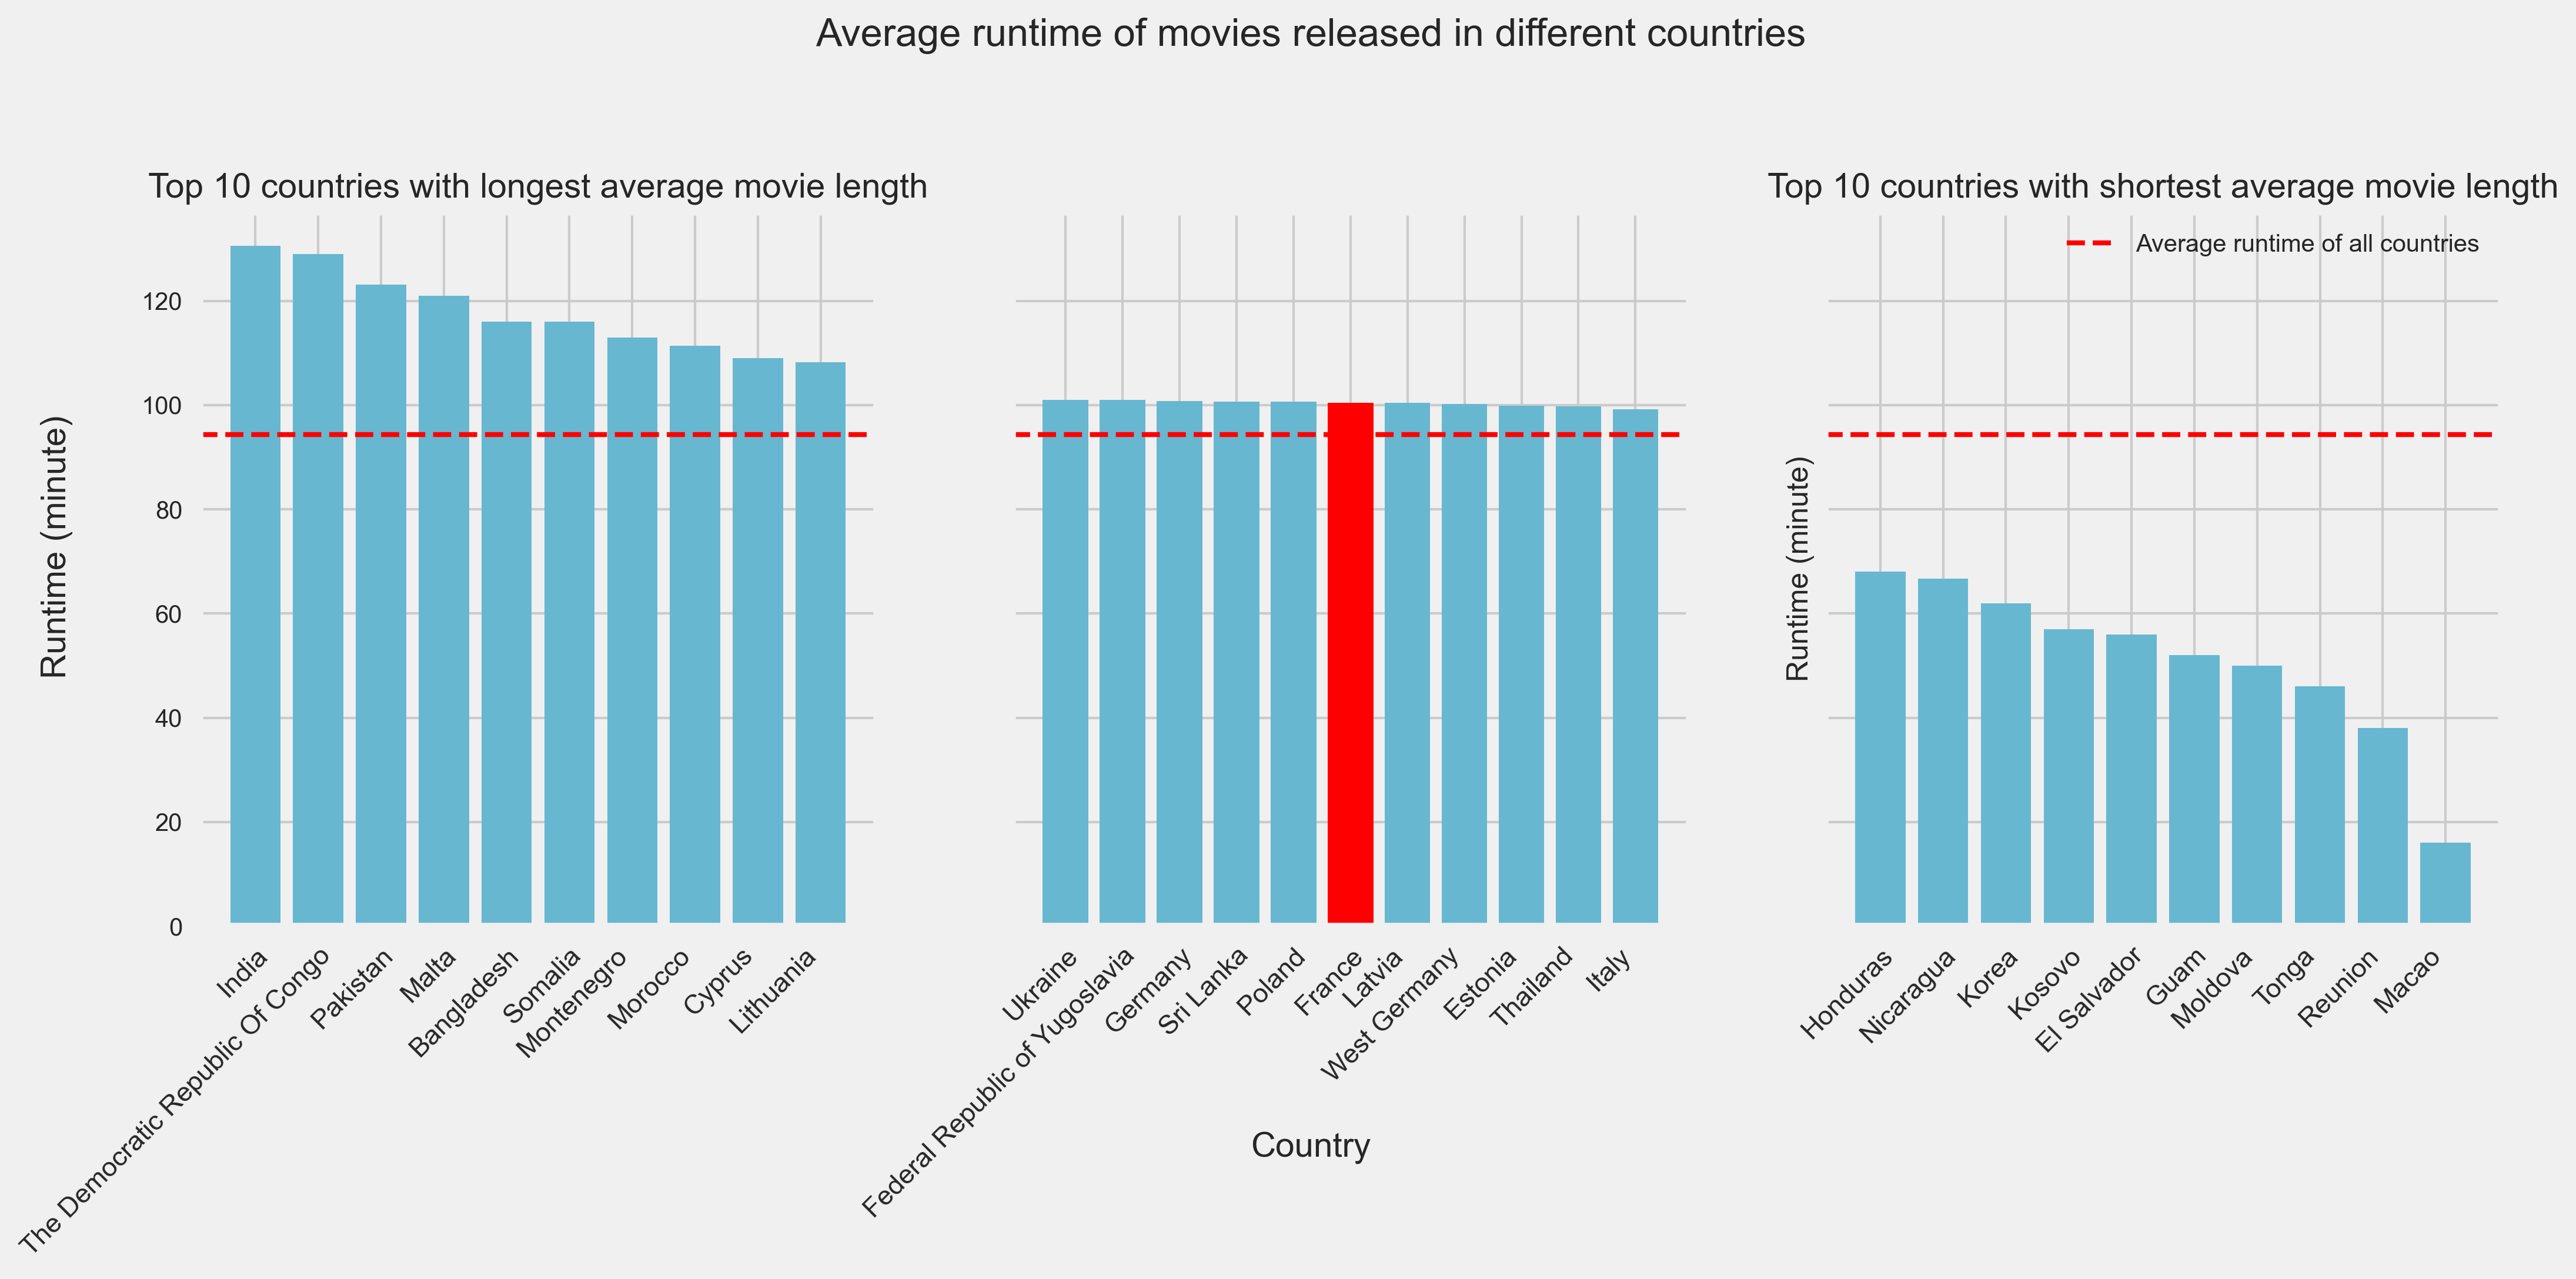

In [32]:
# Draw a dashboard that has one row and three axes.
# The figure illustrates the top ten countries with longest movie length, the middle with France, and the bottom countries

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['figure.dpi'] = 300

# create a figure with mulitple axes that share y axis
fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharey='row')
fig.set_size_inches(15, 5)

fig.suptitle("Average runtime of movies released in different countries", size=16, y=1.1)
fig.supxlabel("Country", size=14, y=-0.2)
fig.supylabel('Runtime (minute)', size=14)


### ax1: Plot ten countries of release that have highest average runtime
x1labels = top_ten(avg_runtime).index.unique()
ax1.set_xticklabels(x1labels, rotation=45, ha='right', rotation_mode='anchor', size=11)
ax1.bar(top_ten(avg_runtime).index, top_ten(avg_runtime)['Runtime'], color='#67B7D1') # plot the bar char

# plot the average horizontal line for the France value
all_avg_runtime = movies_by_country['Runtime'].mean()
ax1.axhline(y=all_avg_runtime, color='red', linestyle='--', linewidth=2, label='Average runtime of all movies')
ax1.set_title("Top 10 countries with longest average movie length", size=14)


### ax2 : Plot ten countries of release that have France in it
x2labels = mid(avg_runtime).index.unique()
ax2.set_xticklabels(x2labels, rotation=45, ha='right', size=11, rotation_mode='anchor')
bar2 = ax2.bar(mid(avg_runtime).index, mid(avg_runtime)['Runtime'], color='#67B7D1')
# plot the average horizontal line for the France value
ax2.axhline(y=all_avg_runtime, color='red', linestyle='--', linewidth=2, label='Average runtime of all countries') 
plt.legend()

# Change the bar color of France
france_runtime_df = mid(avg_runtime)[mid(avg_runtime).index == 'France']
ax2.bar(france_runtime_df.index, france_runtime_df['Runtime'], color='red')


### ax3: Plot the countries of release that have the shortest average runtime
x3labels = bottom_ten(avg_runtime).index.unique()
ax3.set_xticklabels(x3labels, rotation=45, ha='right', size=11, rotation_mode='anchor')
ax3.bar(bottom_ten(avg_runtime).index, bottom_ten(avg_runtime)['Runtime'], color='#67B7D1')
ax3.axhline(y=all_avg_runtime, color='red', linestyle='--', linewidth=2, label='Average runtime of all countries') # plot the line for the France values
ax3.set_title("Top 10 countries with shortest average movie length", size=14)
ax3.set_ylabel("Runtime (minute)", size=12)


#fig.tight_layout()
plt.legend()
plt.show()

#### We can also use Bokeh library to create for an interactive plot for the above dashboard. 
With Bokeh, we can incorporate several tools including hovering feature. I will add the hover tool so that we can hover over the bar to see the name of the country and show its runtime accordingly.

In [33]:
# Use Bokeh to create the above plots for interactive features

from bokeh.layouts import row # use this to display multiple plots in rows
from bokeh.models import ColumnDataSource
from bokeh.models import HoverTool
from bokeh.plotting import figure, output_notebook, show
from math import pi # import pi from math library to use pi when setting the x_label orientation

output_notebook() # output directly from this Jupyter Notebook
figure_width = 300
figure_height = 400

tools = "hover,save,pan,box_zoom,reset,wheel_zoom,help"
source = ColumnDataSource(top_ten(avg_runtime))

x1_range = [i for i in top_ten(avg_runtime).index]
plot1 = figure(x_range=x1_range, plot_width=figure_width, plot_height=figure_height, tools=tools)
plot1.vbar(x='Country', top='Runtime', source=top_ten(avg_runtime), width=0.9, color='lightblue')
plot1.xaxis.major_label_orientation = pi/4

# Add a hover tool to show the runtime value when hovering over the bars
hover = plot1.select(dict(type=HoverTool))
plot1.hover.tooltips = [
    ("Country", "@Country"),
    ("Runtime", "@Runtime"),
    ]

show(plot1)

Loading BokehJS ...

In [34]:
# create plot2

x2_range = [i for i in mid(avg_runtime).index]

plot2 = figure(x_range=x2_range, plot_width=figure_width, plot_height=figure_height, y_range=plot1.y_range, tools=tools)
plot2.vbar(x='Country', top='Runtime',source=mid(avg_runtime), width=0.9, color='lightblue')
plot2.xaxis.major_label_orientation = pi/4

france_df = mid(avg_runtime)[mid(avg_runtime).index=='France']
plot2.vbar(x='Country', top='Runtime', source=france_df, color='red')

# Add a hover tool to show the runtime value when hovering over the bars
hover = plot2.select(dict(type=HoverTool))
plot2.hover.tooltips = [
    ("Country", "@Country"),
    ("Runtime", "@Runtime"),
]

In [35]:
# plot the third figure

x3_range = [i for i in bottom_ten(avg_runtime).index]
plot3 = figure(x_range=x3_range, plot_width=figure_width, plot_height=figure_height, y_range=plot1.y_range, tools=tools)
plot3.vbar(x='Country', top='Runtime',source=bottom_ten(avg_runtime), width=0.9, color='lightblue')
plot3.xaxis.major_label_orientation = pi/4

# Add a hover tool to show the runtime value when hovering over the bars
hover = plot2.select(dict(type=HoverTool))
plot2.hover.tooltips = [
    ("Country", "@Country"),
    ("Runtime", "@Runtime"),
]

In [36]:
# show multiple plots using layout function row
from bokeh.plotting import output_file
output_file("output.html")
show(row(plot1, plot2, plot3))

### Question 2: Does France make better movies on average based on the ratings?

In [37]:
movies_by_country['IMDb'].mean() # average IMDb for all movies

5.966894772268335

In [38]:
# average runtime of all movies made by France
france_rating = movies_by_country[movies_by_country['Country'] == 'France']['IMDb'].mean()
france_rating

6.375038759689923

In [39]:
# create a new dataframe of average IMDb and Rotten Tomatoes scores by country
avg_rating = movies_by_country.groupby('Country', as_index=False).mean()[['Country', 'IMDb', 'Rotten Tomatoes']]

avg_rating.describe()

IMDb  Rotten Tomatoes
count  161.000000       116.000000
mean     6.512259         0.747188
std      0.815039         0.158056
min      3.600000         0.180000
25%      6.014286         0.651994
50%      6.500000         0.735233
75%      7.033333         0.870000
max      8.900000         1.000000

In [40]:
# find rating scores of movies made by France
avg_rating[avg_rating['Country'] == 'France']

Country      IMDb  Rotten Tomatoes
48  France  6.375039         0.700366

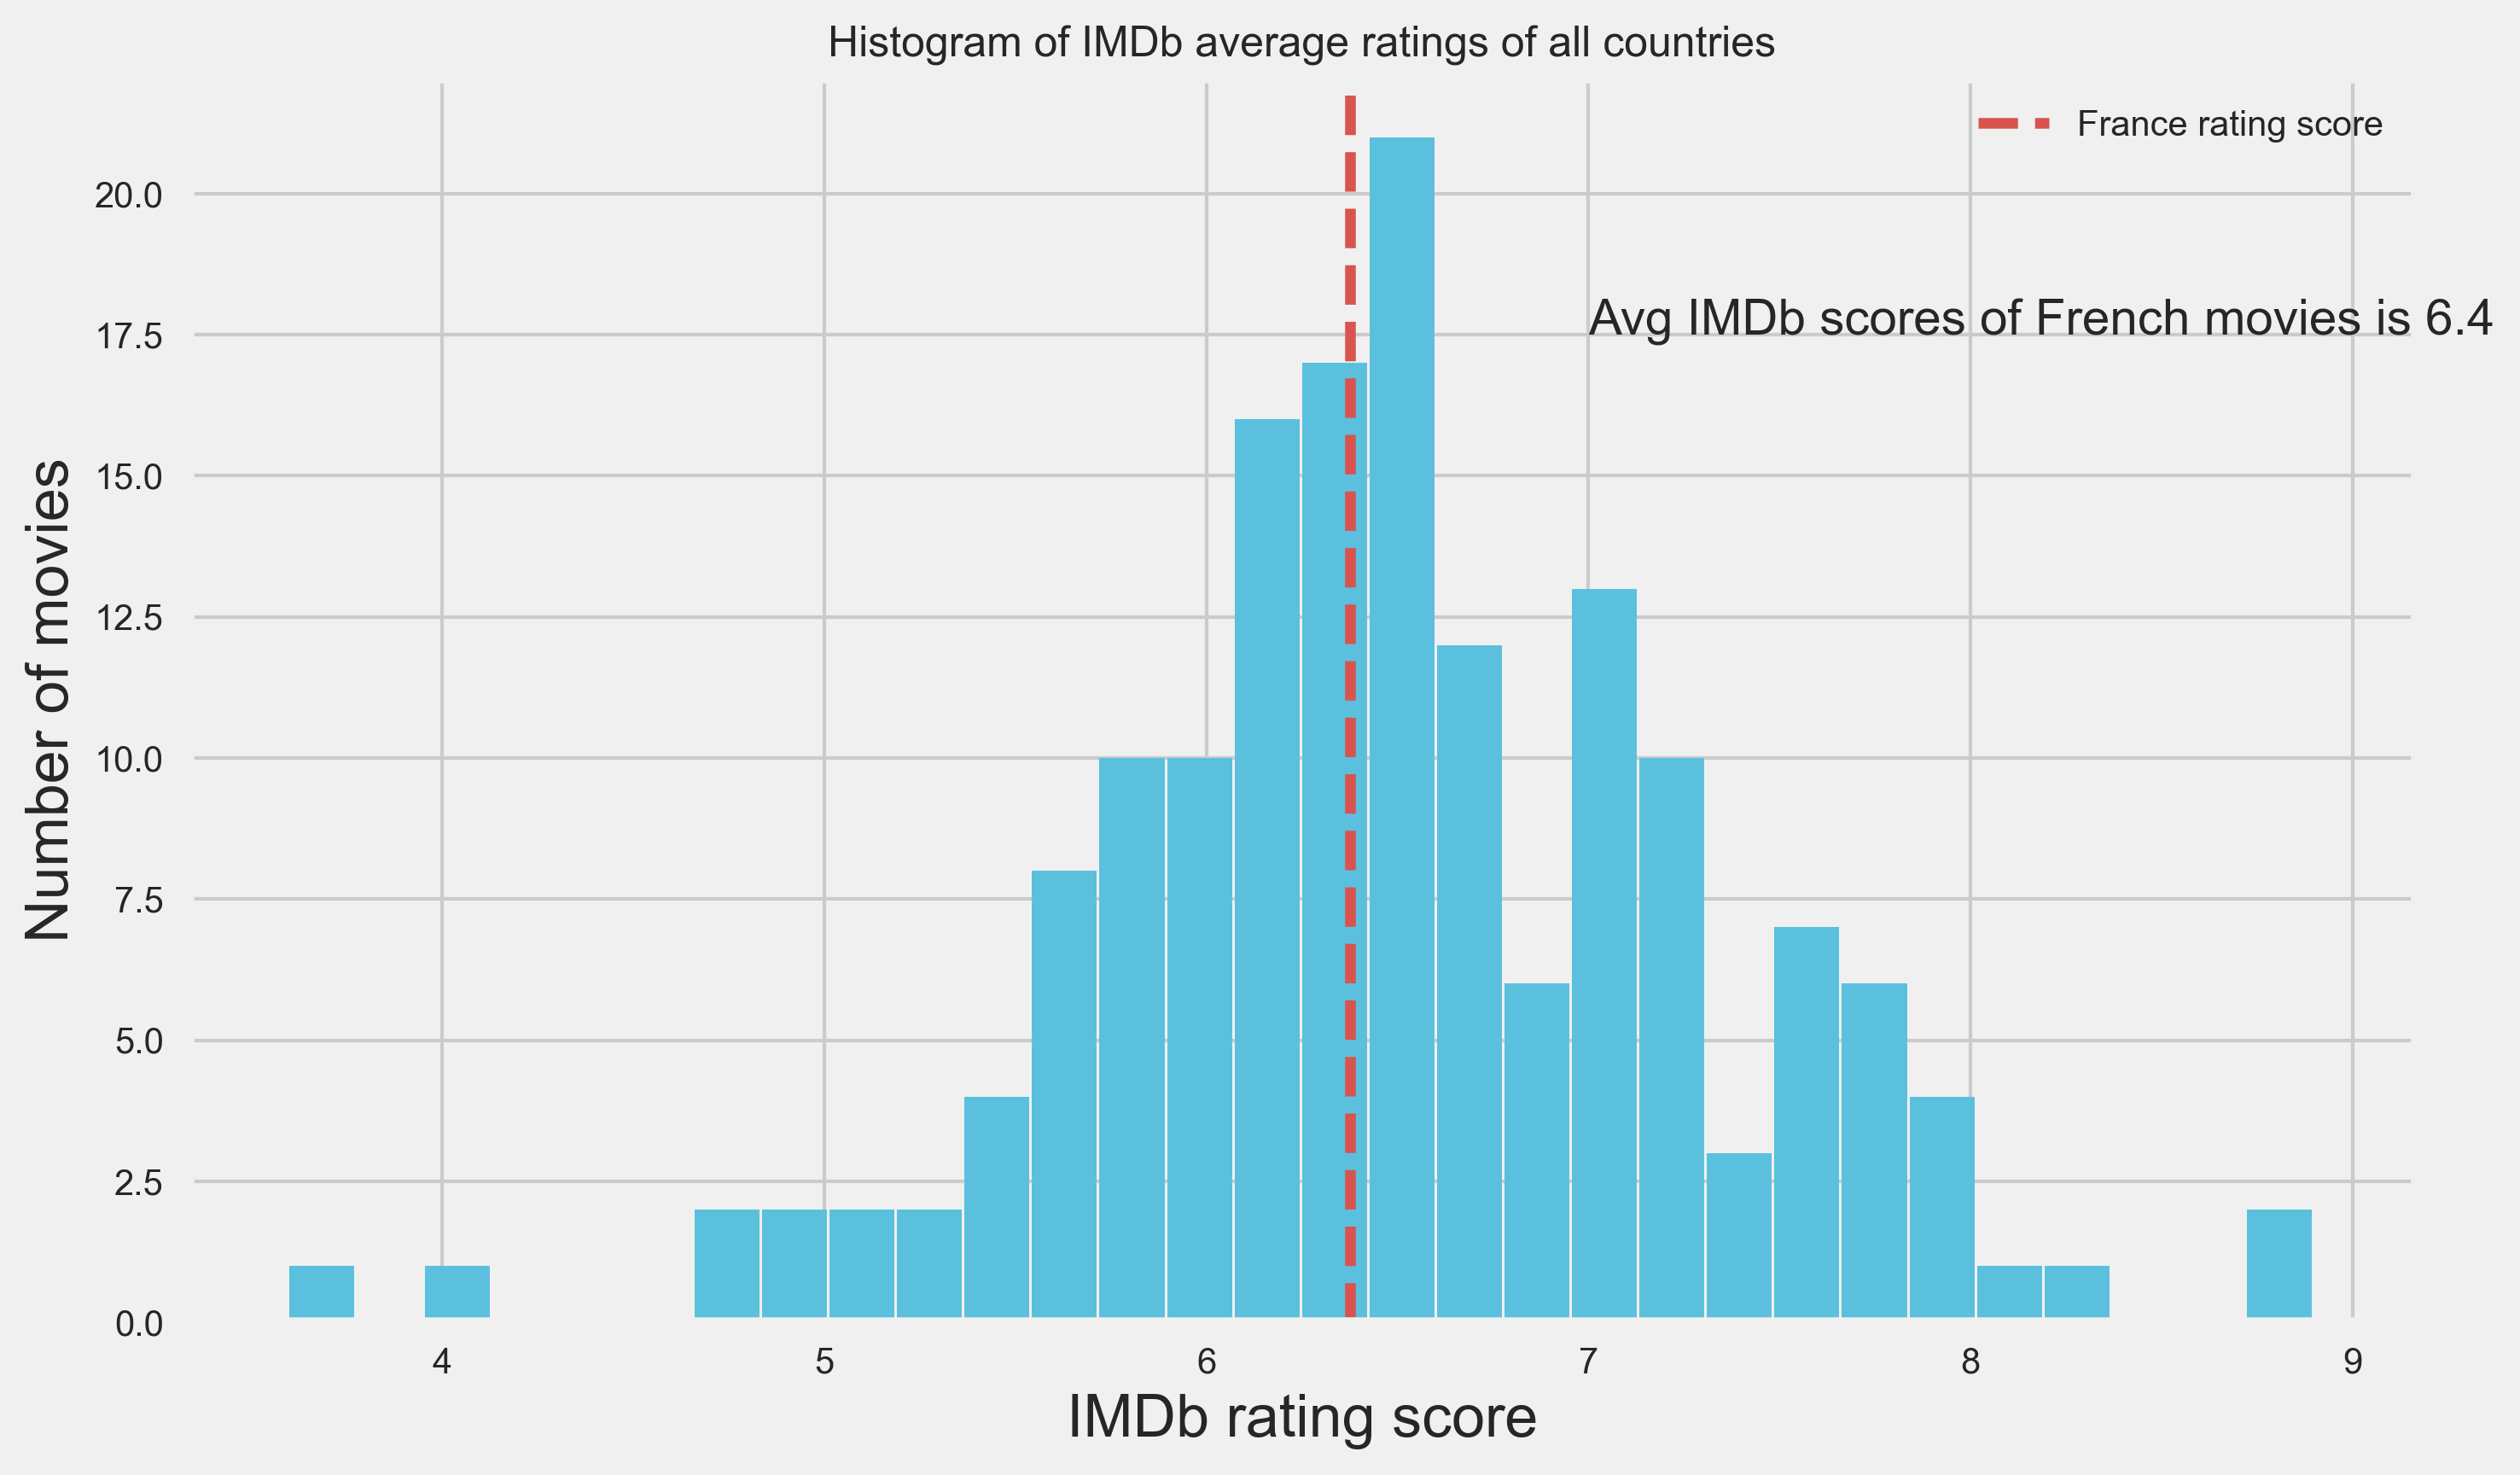

In [41]:
fig, ax = plt.subplots() #create a figure and an axe by calling the pyplot.subplots function usting the variables fig and ax
fig.set_size_inches(10, 6)
plt.style.use('seaborn')

ax.grid(zorder=0)
ax.hist(avg_rating['IMDb'], bins=30, color = '#5bc0de', width=0.17)

# plot the vertical line of averate rating score for France
ax.axvline(x=france_rating, color='#d9534f', linestyle='--', linewidth=3, label='France rating score') # plot the line for the France values

ax.set_xlabel('IMDb rating score')
ax.set_ylabel('Number of movies')
ax.set_title('Histogram of IMDb average ratings of all countries')

plt.text(7, 17.5, f'Avg IMDb scores of French movies is {round(france_rating,1)}', size=14)

plt.legend()
plt.show()

##### We can plot a histogram of Rotten Tomatoes score to see how French movies are rated in the eyes of professional critics compared to movies made by other countries.
I will use seaborn.hisplot function to take advantage of their dataframe-oriented visualisation function and style. There will be less work when setting features for the figure if we like the style.

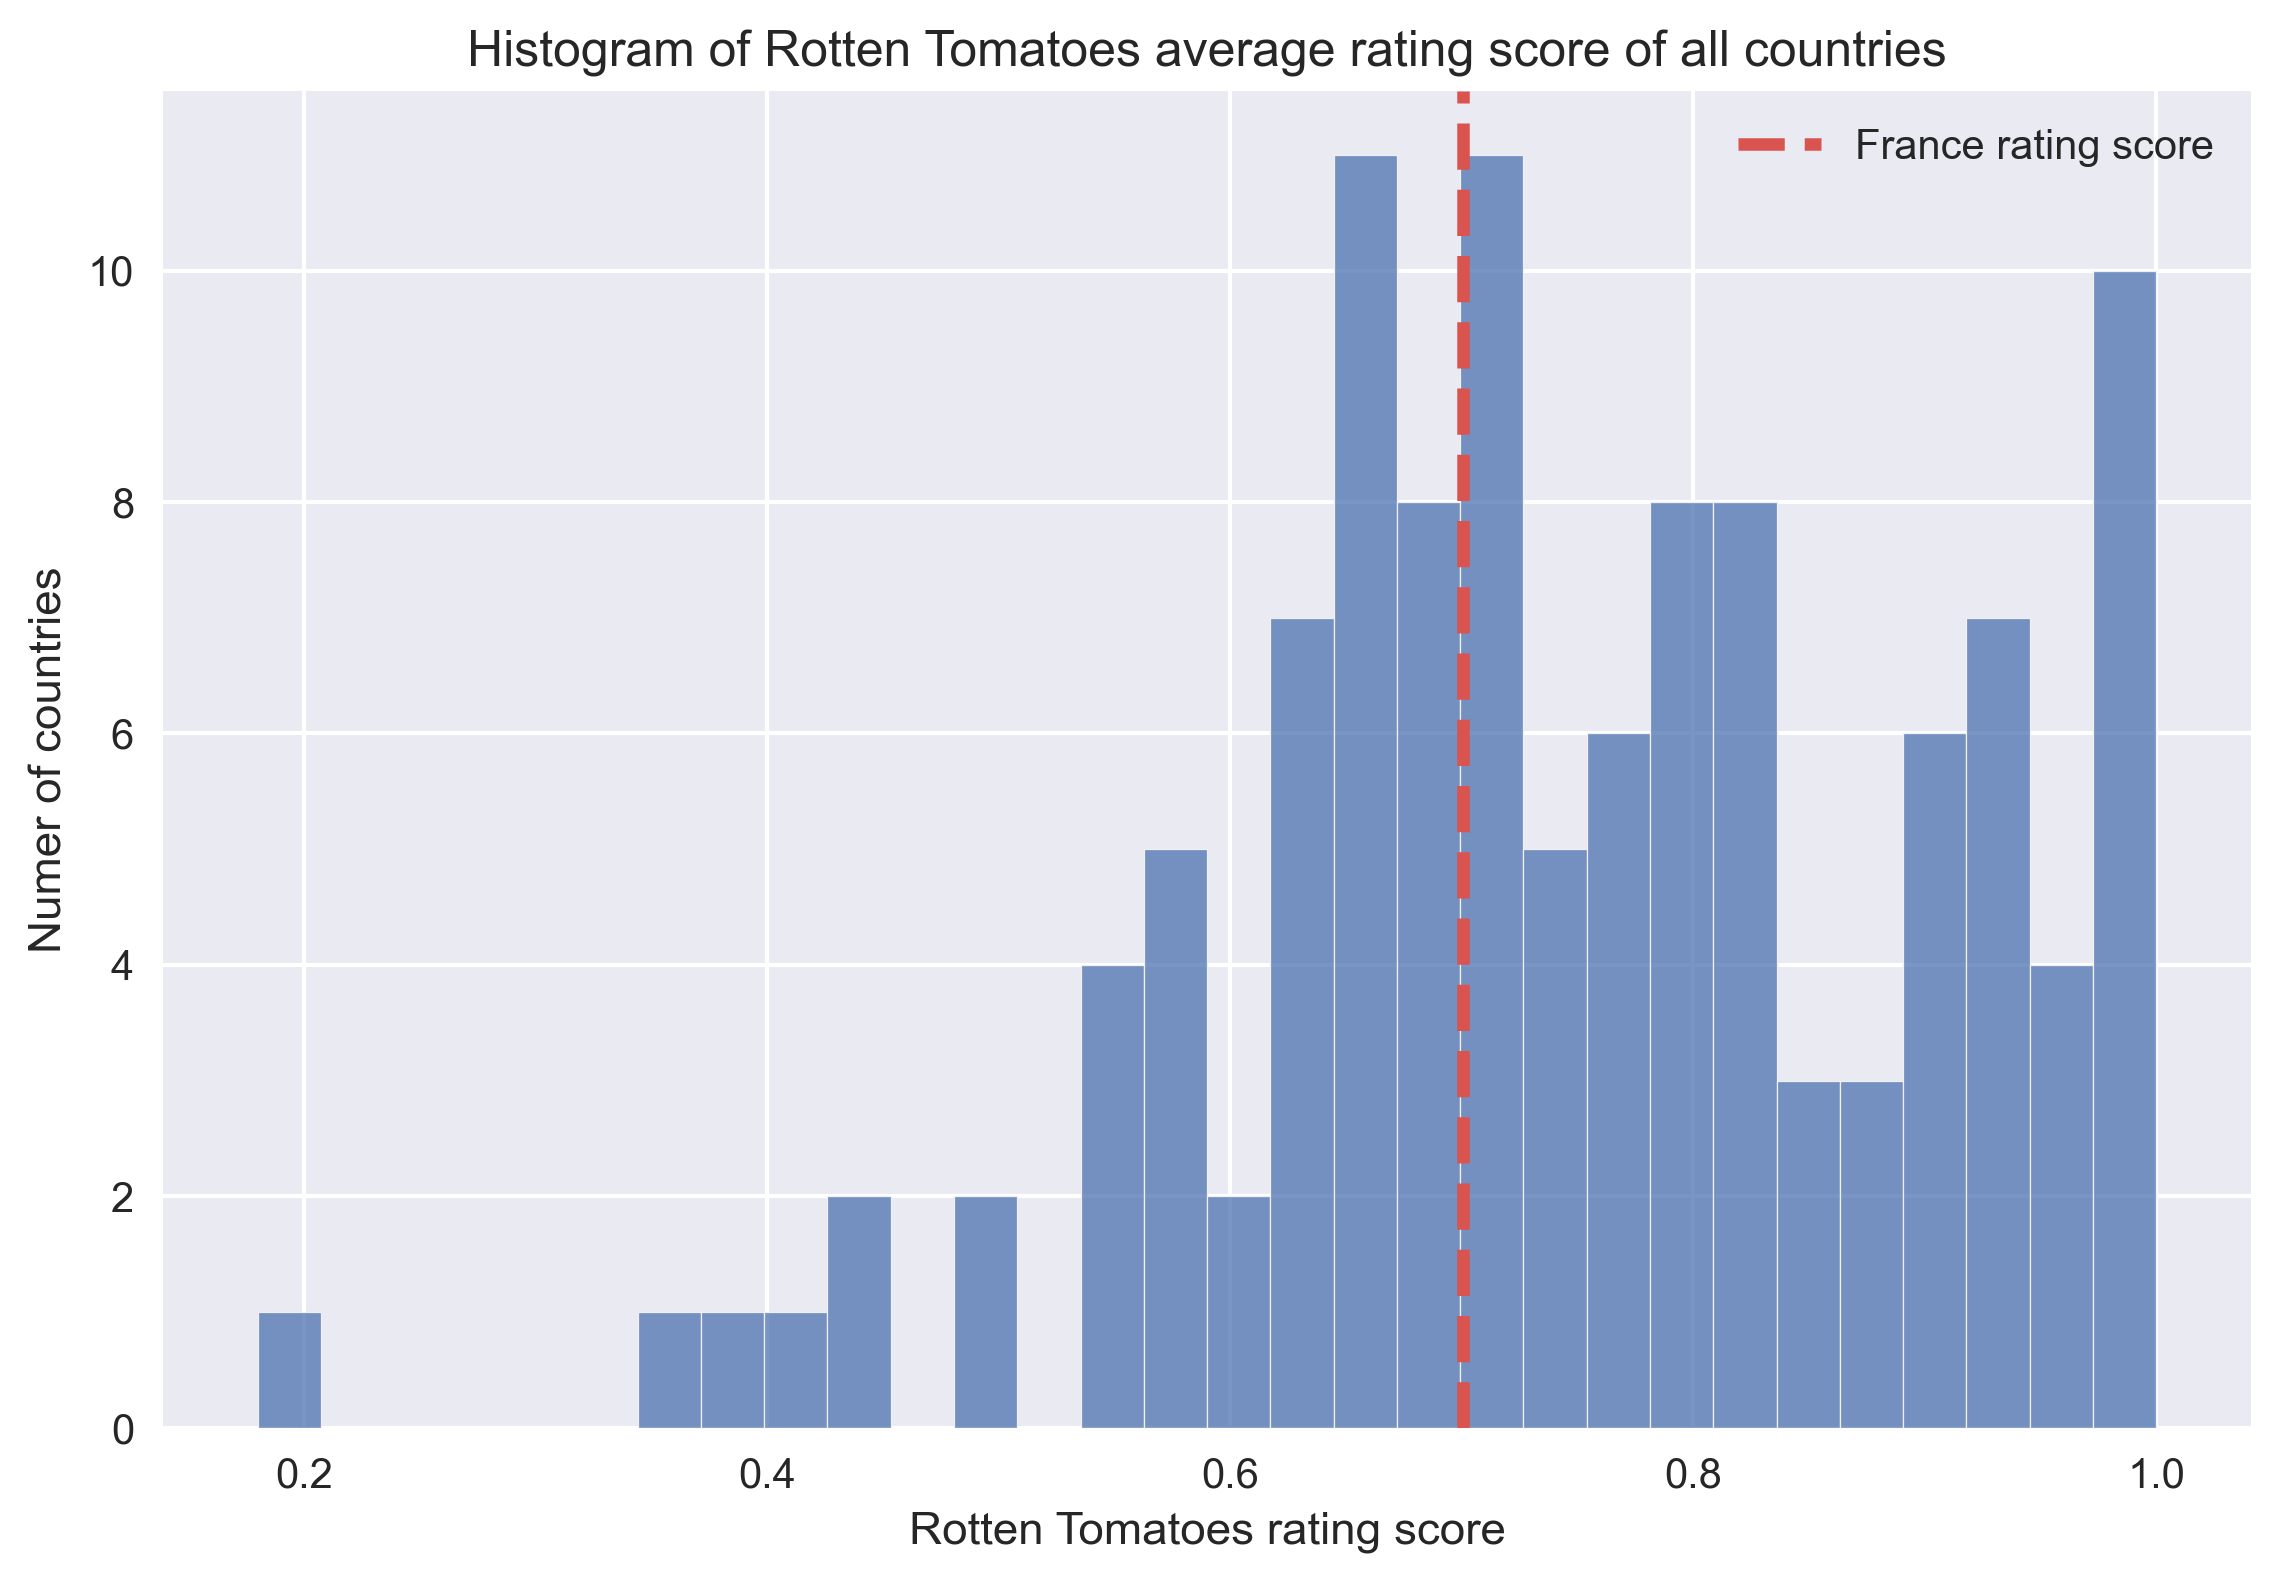

In [42]:
import seaborn as sns
plt.style.use('seaborn')
plt.rcParams['figure.dpi'] = 300

ax = sns.histplot(data=avg_rating, x='Rotten Tomatoes', bins=30)
ax.set(xlabel='Rotten Tomatoes rating score', ylabel='Numer of countries', 
       title='Histogram of Rotten Tomatoes average rating score of all countries')
# plot the line for the France values
tomatoes_france = movies_by_country[movies_by_country['Country'] == 'France']['Rotten Tomatoes'].mean()
ax.axvline(x=tomatoes_france, color='#d9534f', linestyle='--', linewidth=3, label='France rating score') 

plt.legend()
plt.show()

In [43]:
tomatoes_france = movies_by_country[movies_by_country['Country'] == 'France']['Rotten Tomatoes'].mean()
tomatoes_france
movies_by_country['Rotten Tomatoes'].mean()

0.6519674376141218

#### **Answer Question 2:**
<Font color='red'>**IMDb ratings range from 3.6 to 8.9 points, French movies has the rating of 6.4, which is about the average rating in all countries (6.0). The histogram show France average rating is located around the middle of the entire distribution.**
    
<Font color='red'>**Similar to IMDb ratings, the professional critics rated movies made by France in average 0.7 points, which is in the average range for all movies.**

##### We can aldo see how French movies were rated over time using Seaborn lineplot function.

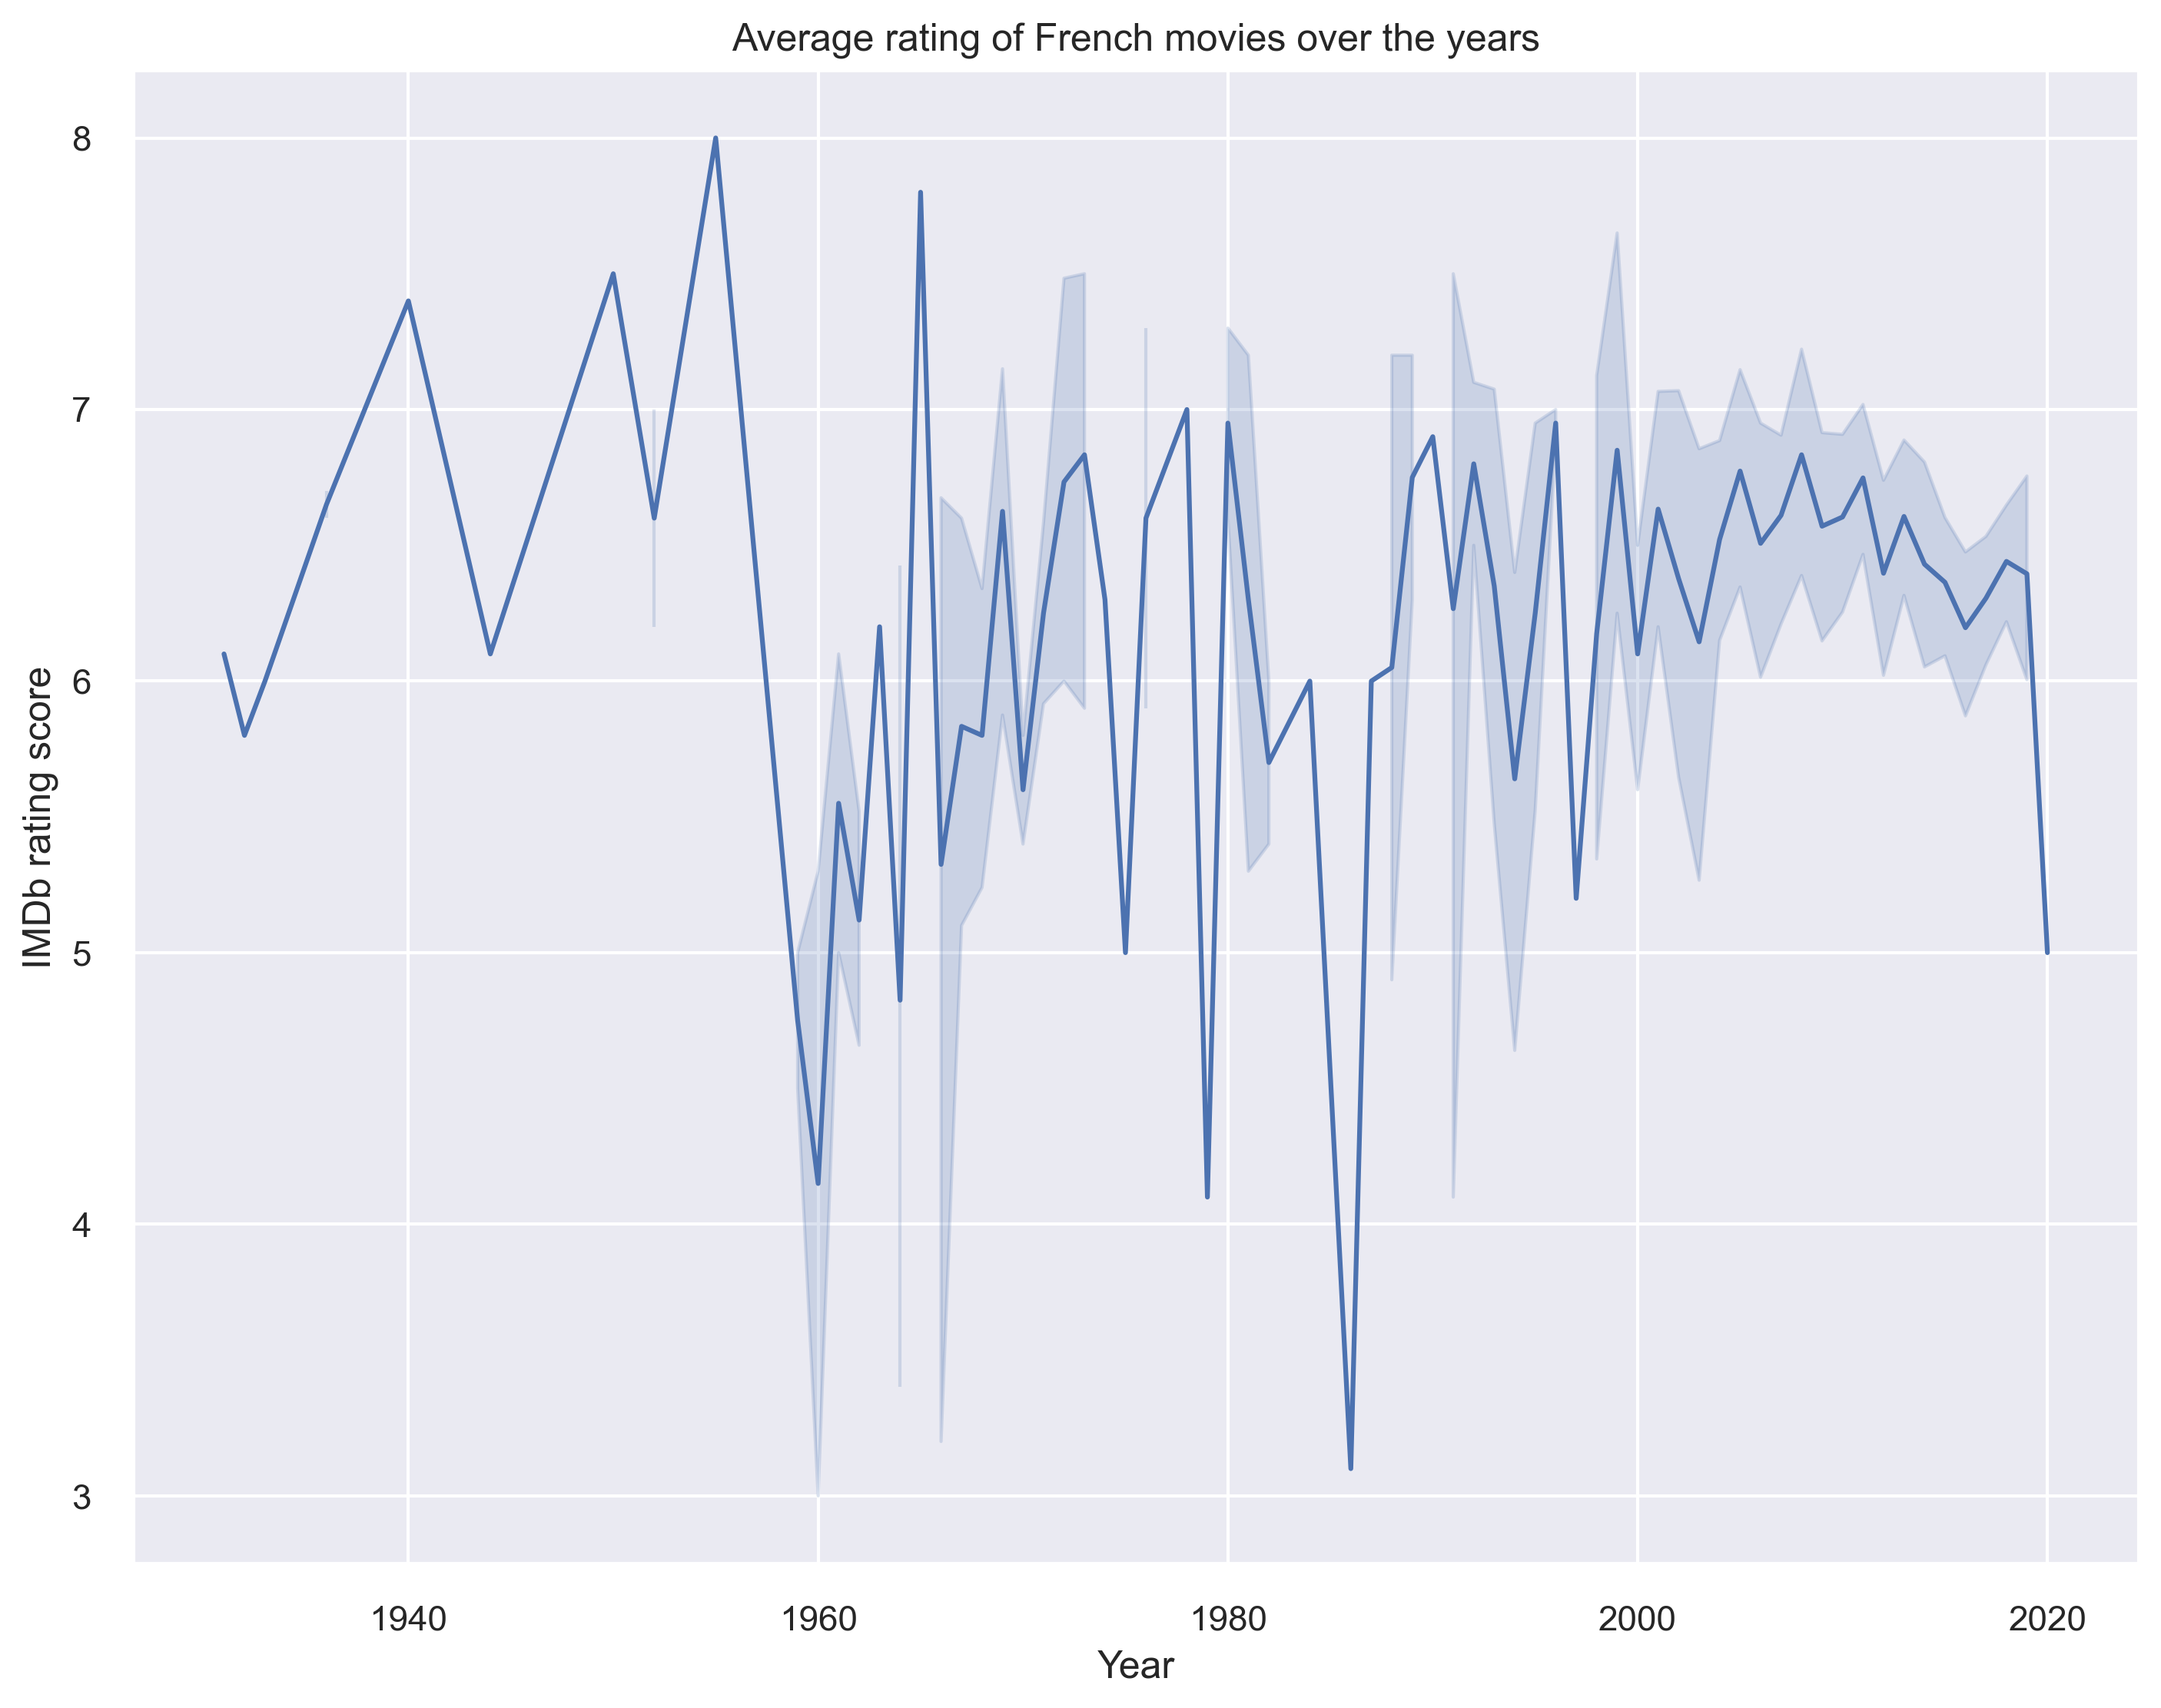

In [44]:
import seaborn as sns # import seaborn

sns.set(rc={'figure.figsize':(10,8)})  # set the size for the figure
France_movies = movies_by_country[movies_by_country.Country == 'France']
ax = sns.lineplot(data=France_movies, x='Year', y='IMDb')
ax.set(xlabel='Year', 
       ylabel='IMDb rating score', 
       title='Average rating of French movies over the years')

plt.show()

### Question 3: Are there any French movies that claim to be of more than one genre? 
(e.g. Avengers Infinity War is an adventure movie but not comedy, whereas Back to The Future is both)

In [45]:
movies_by_country.groupby('Country')[['Title', 'Runtime']].count().loc['France']

Title      646
Runtime    646
Name: France, dtype: int64

In [46]:
# create dummy variables for different genres from the movies_by_country dataframe
dummies = movies_by_country['Genres'].str.get_dummies(sep=',')
dummies

Action  Adventure  Animation  Biography  Comedy  Crime  Documentary  \
0           1          1          0          0       0      0            0   
2           0          0          0          0       0      0            0   
2           0          0          0          0       0      0            0   
4           0          0          0          0       0      0            0   
5           1          1          0          0       0      0            0   
...       ...        ...        ...        ...     ...    ...          ...   
15064       0          0          0          0       1      0            0   
15065       1          0          0          0       0      0            0   
15066       0          0          0          0       1      0            0   
15067       0          0          0          0       1      0            0   
15068       0          0          0          0       0      0            1   

       Drama  Family  Fantasy  Film-Noir  Game-Show  History  Horror  Music  \
0          0       0        0          0          0        0       0      0   
2          0       0        0          0          0        0       1      0   
2          0       0        0          0          0        0       1      0   
4          1       0        0          0          0        0       0      0   
5          0       0        1          0          0        0       0      0   
...      ...     ...      ...        ...        ...      ...     ...    ...   
15064      0       0        0          0          0        0       0      0   
15065      0       0        0          0          0        0       0      0   
15066      0       0        0          0          0        0       0      0   
15067      1       0        0          0          0        0       0      1   
15068      1       0        0          0          0        1       0      0   

       Musical  Mystery  News  Reality-TV  Romance  Sci-Fi  Short  Sport  \
0            0        0     0           0        0       0      0      0   
2            0        1     0           0        0       0      0      0   
2            0        1     0           0        0       0      0      0   
4            0        0     0           0        0       0      1      0   
5            0        0     0           0        0       0      0      0   
...        ...      ...   ...         ...      ...     ...    ...    ...   
15064        0        0     0           0        1       0      0      0   
15065        0        0     0           0        0       1      0      0   
15066        0        0     0           0        0       0      0      0   
15067        0        0     0           0        0       0      0      0   
15068        0        0     0           0        0       0      0      0   

       Talk-Show  Thriller  War  Western  
0              0         0    0        1  
2              0         1    0        0  
2              0         1    0        0  
4              0         0    0        0  
5              0         0    1        0  
...          ...       ...  ...      ...  
15064          0         0    0        0  
15065          0         1    0        0  
15066          0         0    0        0  
15067          0         0    0        0  
15068          0         0    0        0  

[17832 rows x 27 columns]

In [47]:
# Concatenate these dummies of genre columns to the movies_by_country data frame
movies_country_genre = (pd.concat([movies_by_country, dummies], axis = 1)
                           .drop(['Genres'], axis = 1)
                       )
movies_country_genre # the dataset contains countries in separate row, genres in separate columns

Country                   Title  Year  Age  IMDb  \
0      United States            Trigger Pals  1939  NaN   5.3   
2      United States              Open Grave  2013  18+   6.2   
2            Hungary              Open Grave  2013  18+   6.2   
4      United States         Beyond the Pale  2014  NaN   7.4   
5             Russia             White Tiger  1996  13+   5.0   
...              ...                     ...   ...  ...   ...   
15064  United States            Holiday Rush  2019   7+   4.8   
15065  United States          Demolition Man  1993  18+   6.7   
15066         Turkey  Düğün Dernek 2: Sünnet  2015  13+   6.4   
15067          India             Fanney Khan  2018  NaN   4.5   
15068  United States               Off Label  2013  NaN   5.2   

       Rotten Tomatoes                      Directors        Language  \
0                  NaN                   Sam Newfield         English   
2                 0.18          Gonzalo López-Gallego         English   
2                 0.18          Gonzalo López-Gallego         English   
4                  NaN                    Ja-Ann Wang         English   
5                  NaN             Karen Shakhnazarov  Russian,German   
...                ...                            ...             ...   
15064              NaN                   Leslie Small         English   
15065             0.59                Marco Brambilla         English   
15066              NaN                 Selçuk Aydemir         Turkish   
15067             0.63                 Atul Manjrekar             NaN   
15068             0.50  Donal Mosher,Michael Palmieri         English   

       Runtime  Action  Adventure  Animation  Biography  Comedy  Crime  \
0         59.0       1          1          0          0       0      0   
2        102.0       0          0          0          0       0      0   
2        102.0       0          0          0          0       0      0   
4         11.0       0          0          0          0       0      0   
5        104.0       1          1          0          0       0      0   
...        ...     ...        ...        ...        ...     ...    ...   
15064     92.0       0          0          0          0       1      0   
15065    115.0       1          0          0          0       0      0   
15066    112.0       0          0          0          0       1      0   
15067    130.0       0          0          0          0       1      0   
15068     80.0       0          0          0          0       0      0   

       Documentary  Drama  Family  Fantasy  Film-Noir  Game-Show  History  \
0                0      0       0        0          0          0        0   
2                0      0       0        0          0          0        0   
2                0      0       0        0          0          0        0   
4                0      1       0        0          0          0        0   
5                0      0       0        1          0          0        0   
...            ...    ...     ...      ...        ...        ...      ...   
15064            0      0       0        0          0          0        0   
15065            0      0       0        0          0          0        0   
15066            0      0       0        0          0          0        0   
15067            0      1       0        0          0          0        0   
15068            1      1       0        0          0          0        1   

       Horror  Music  Musical  Mystery  News  Reality-TV  Romance  Sci-Fi  \
0           0      0        0        0     0           0        0       0   
2           1      0        0        1     0           0        0       0   
2           1      0        0        1     0           0        0       0   
4           0      0        0        0     0           0        0       0   
5           0      0        0        0     0           0        0       0   
...       ...    ...      ...      ...   ...         ...      ...     ...   
15

In [48]:
# create a new dataset contains movies by genre of France only

condition0 = movies_country_genre['Country'] == 'France'
french_genre_sum = movies_country_genre[condition0]

french_genre_sum['Genre_sum'] = french_genre_sum.iloc[:, 9:36].sum(axis=1)

#Genre_sum = temp_df.iloc[:, 9:37].sum(axis=1)
#len(Genre_sum)

# append the column to the data frame
#df_genre_sum = df.assign(Genre_sum = Genre_sum)

# add a Count column to count movies
french_genre_sum['Count'] = 1

french_genre_sum # data frame that contains only movies made by France with the sum of genres column


C:\Users\a1777963\AppData\Local\Temp\ipykernel_30004\990658682.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  french_genre_sum['Genre_sum'] = french_genre_sum.iloc[:, 9:36].sum(axis=1)
C:\Users\a1777963\AppData\Local\Temp\ipykernel_30004\990658682.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  french_genre_sum['Count'] = 1


Country                              Title  Year  Age  IMDb  \
7      France                          Manderlay  2005  NaN   7.3   
31     France        Mystery of the Pink Dolphin  2015  NaN   7.1   
37     France                    Sherlock Gnomes  2018   7+   5.2   
49     France                      My Revolution  2016  NaN   3.5   
78     France                  Girl on a Bicycle  2013  18+   6.2   
...       ...                                ...   ...  ...   ...   
14851  France                        Point Blank  2019  18+   5.7   
14894  France                 Custer of the West  1967  all   5.8   
14948  France   A Spell to Ward Off the Darkness  2013   7+   6.2   
15029  France                     Made in France  2015  18+   6.2   
15060  France  Michael H. – Profession: Director  2013  13+   7.0   

       Rotten Tomatoes               Directors  \
7                 0.50          Lars von Trier   
31                 NaN             Eric Ellena   
37                0.27          John Stevenson   
49                 NaN        Ramzi Ben Sliman   
78                0.08            Jeremy Leven   
...                ...                     ...   
14851             0.38               Joe Lynch   
14894             0.25          Robert Siodmak   
14948             0.95  Ben Rivers,Ben Russell   
15029              NaN       Nicolas Boukhrief   
15060             0.91         Yves Montmayeur   

                              Language  Runtime  Action  Adventure  Animation  \
7                              English    139.0       0          0          0   
31     French,English,Portuguese,Dutch     52.0       0          0          0   
37                    English,Mandarin     86.0       0          1          1   
49                              French     80.0       0          0          0   
78       English,French,German,Italian    101.0       0          0          0   
...                                ...      ...     ...        ...        ...   
14851                          English     86.0       1          0          0   
14894                          English    140.0       0          0          0   
14948                          English     98.0       0          0          0   
15029                           French     89.0       0          0          0   
15060                    German,French     92.0       0          0          0   

       Biography  Comedy  Crime  Documentary  Drama  Family  Fantasy  \
7              0       0      0            0      1       0        0   
31             0       0      0            1      0       0        0   
37             0       1      0            0      0       1        1   
49             0       0      0            0      1       0        0   
78             0       1      0            0      1       0        0   
...          ...     ...    ...          ...    ...     ...      ...   
14851          0       0      0            0      0       0        0   
14894          1       0      0            0      1       0        0   
14948          0       0      0            1      0       0        0   
15029          0       0      1            0      1       0        0   
15060          1       0      0            1      0       0        0   

       Film-Noir  Game-Show  History  Horror  Music  Musical  Mystery  News  \
7              0          0        0       0      0        0        0     0   
31             0          0        0       0      0        0        0     0   
37             0          0        0       0      0        0        1     0   
49             0          0        0       0      0        0        0     0   
78             0          0        0       0      0        0        0     0   
...          ...        ...      ...     ...    ...      ...      ...   ...   
14851          0          0        0       0      0        0        0     0   
14894          0          0        1       0      0        0        0     0   
14948          0          0

In [49]:
# checking the Genre_sum column if there are any column equal to zero
french_genre_sum[french_genre_sum['Genre_sum']==0].count()

Country            0
Title              0
Year               0
Age                0
IMDb               0
Rotten Tomatoes    0
Directors          0
Language           0
Runtime            0
Action             0
Adventure          0
Animation          0
Biography          0
Comedy             0
Crime              0
Documentary        0
Drama              0
Family             0
Fantasy            0
Film-Noir          0
Game-Show          0
History            0
Horror             0
Music              0
Musical            0
Mystery            0
News               0
Reality-TV         0
Romance            0
Sci-Fi             0
Short              0
Sport              0
Talk-Show          0
Thriller           0
War                0
Western            0
Genre_sum          0
Count              0
dtype: int64

In [50]:
french_genre_sum.groupby(['Genre_sum']).count()['Count']

Genre_sum
1    170
2    187
3    159
4     75
5     37
6     11
7      6
8      1
Name: Count, dtype: int64

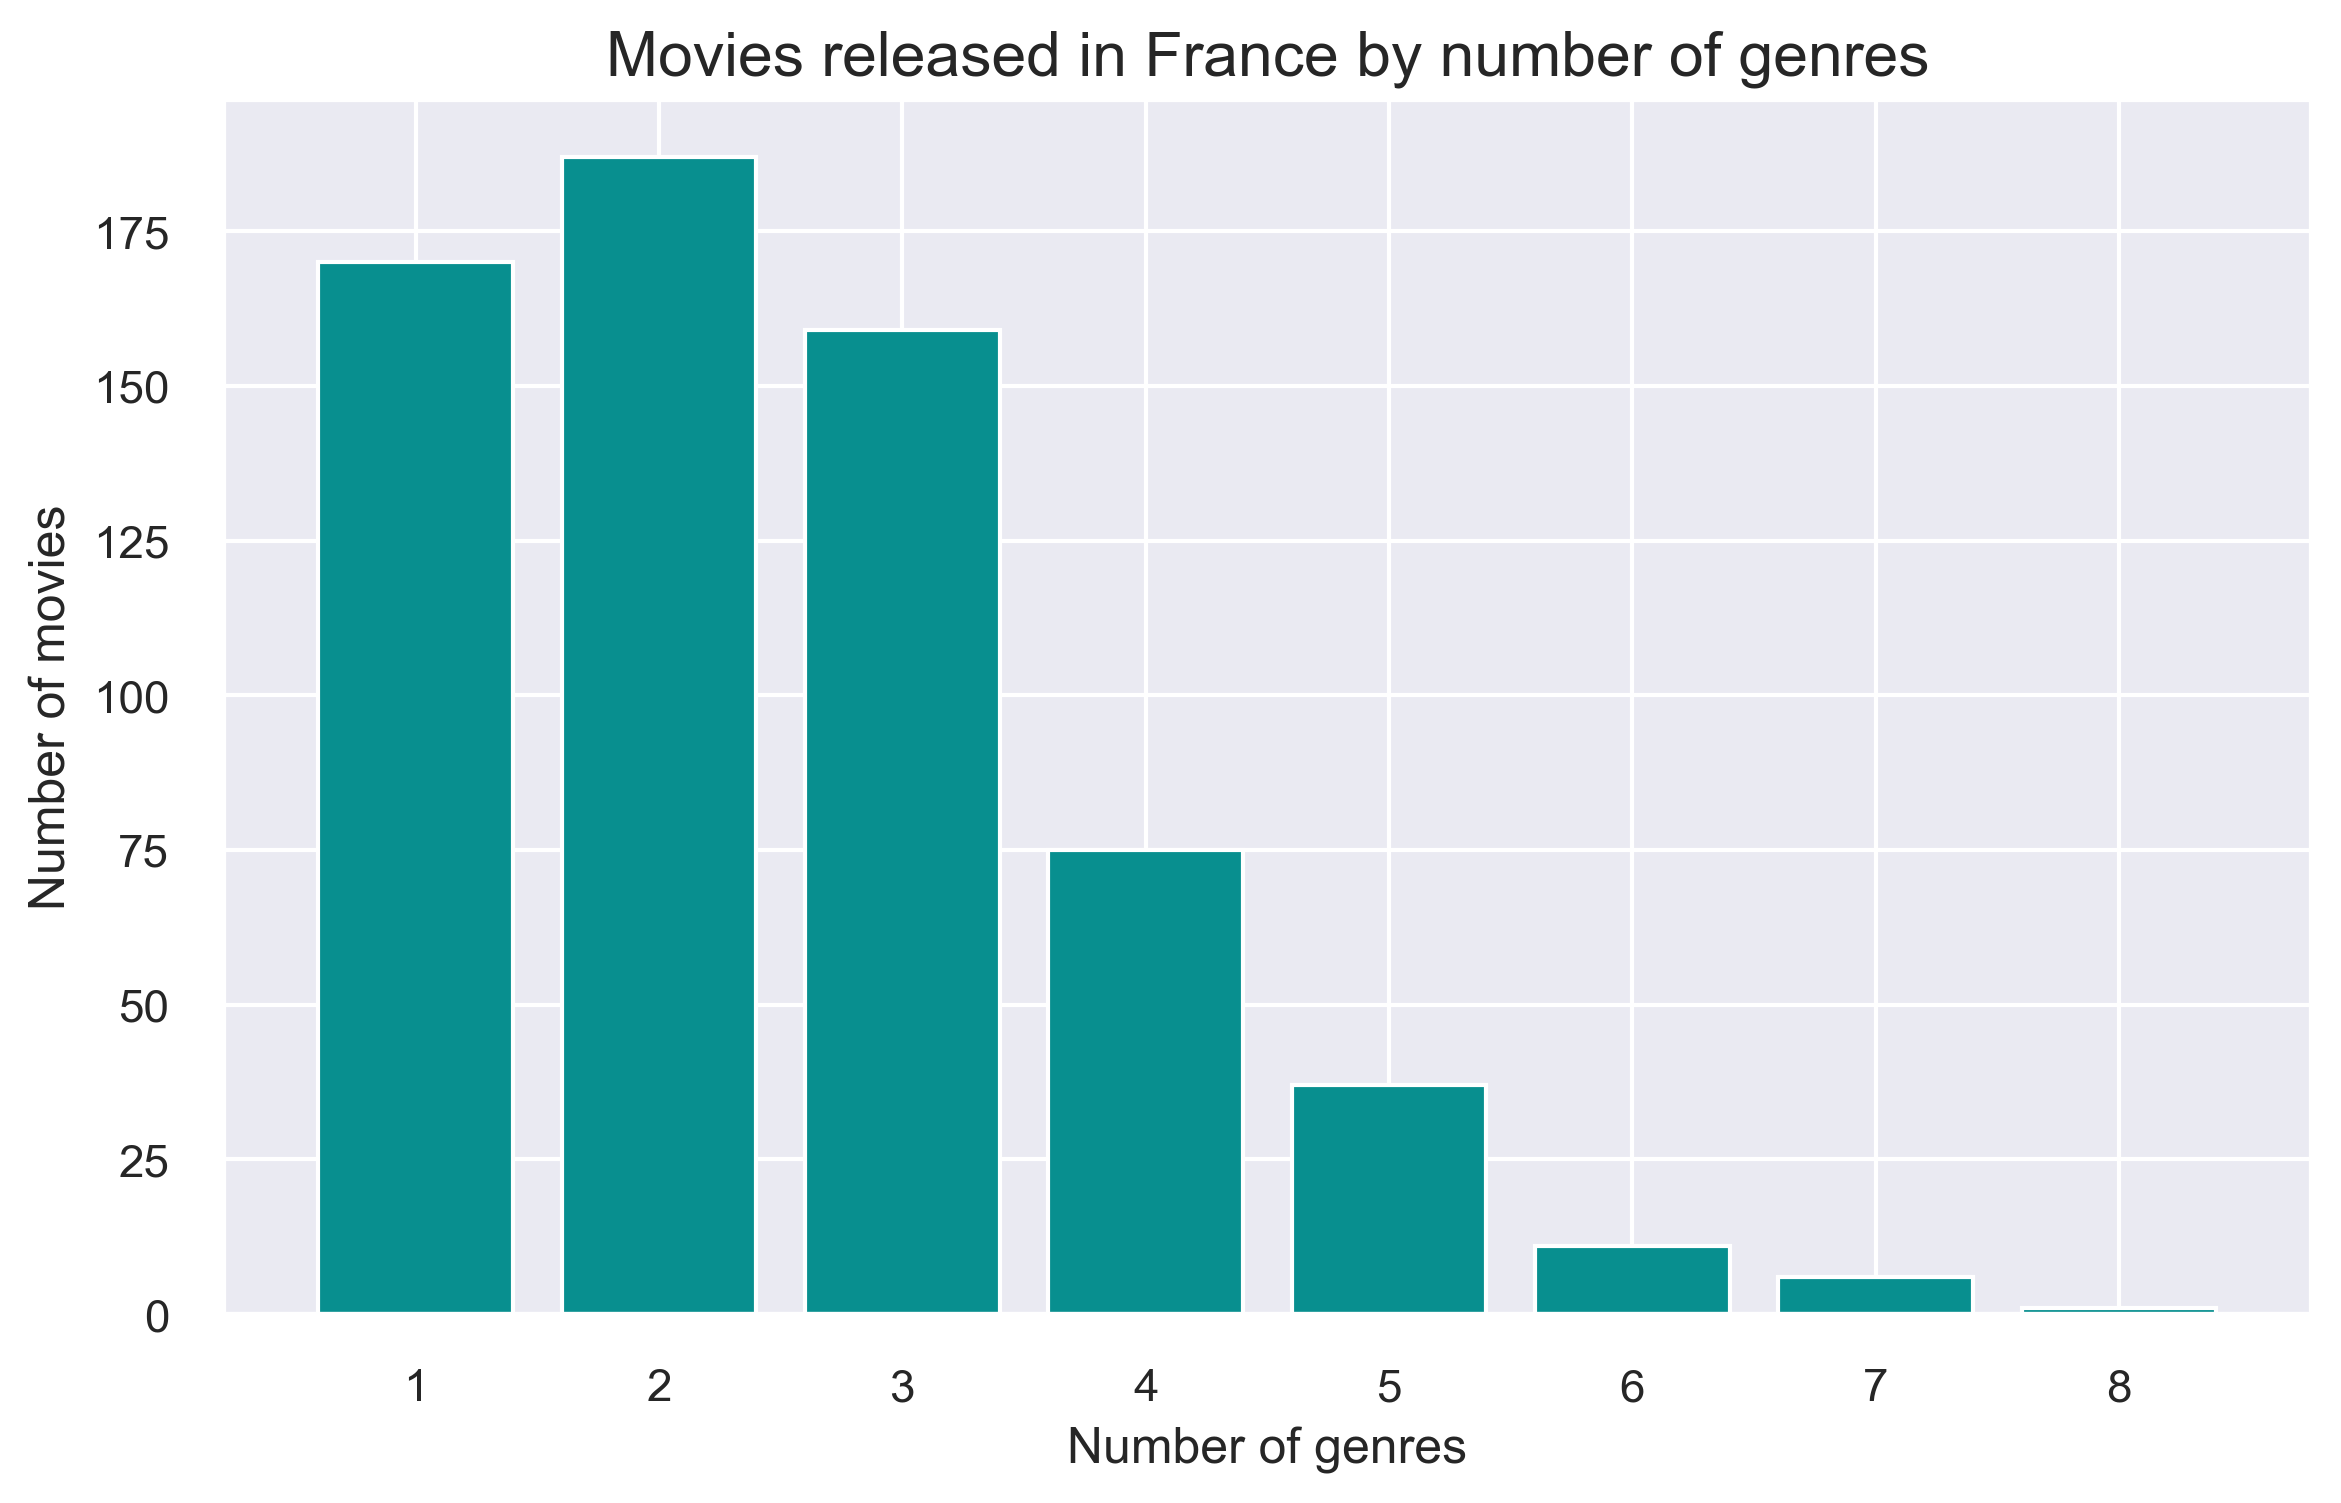

In [51]:
# draw a barplot for the sum number of genre of France movies

plt.figure(figsize = (8, 5))
keys = [pair for pair, df in french_genre_sum.groupby(['Genre_sum'])] # use list comprehension

plt.bar(keys, french_genre_sum.groupby(['Genre_sum']).count()['Count'], facecolor = '#088F8F')

plt.xticks(keys)
plt.title('Movies released in France by number of genres', size=15)
plt.xlabel('Number of genres')
plt.ylabel('Number of movies')

plt.show()

#### **Answer Question 3:**
<font color='red'> **There are French movies that claim to be of more than one genres. Specifically, there are 187 movies that are in two genres, 159 movies claimed to be three genres, etc.**


In [52]:
# top six genres made by France over the years
french_prodcount = (french_genre_sum[["Year", "Title"]]
             .groupby("Year")
             .count()
            )

french_prodcount.tail()

Title
Year       
2016     57
2017     58
2018     55
2019     20
2020      1

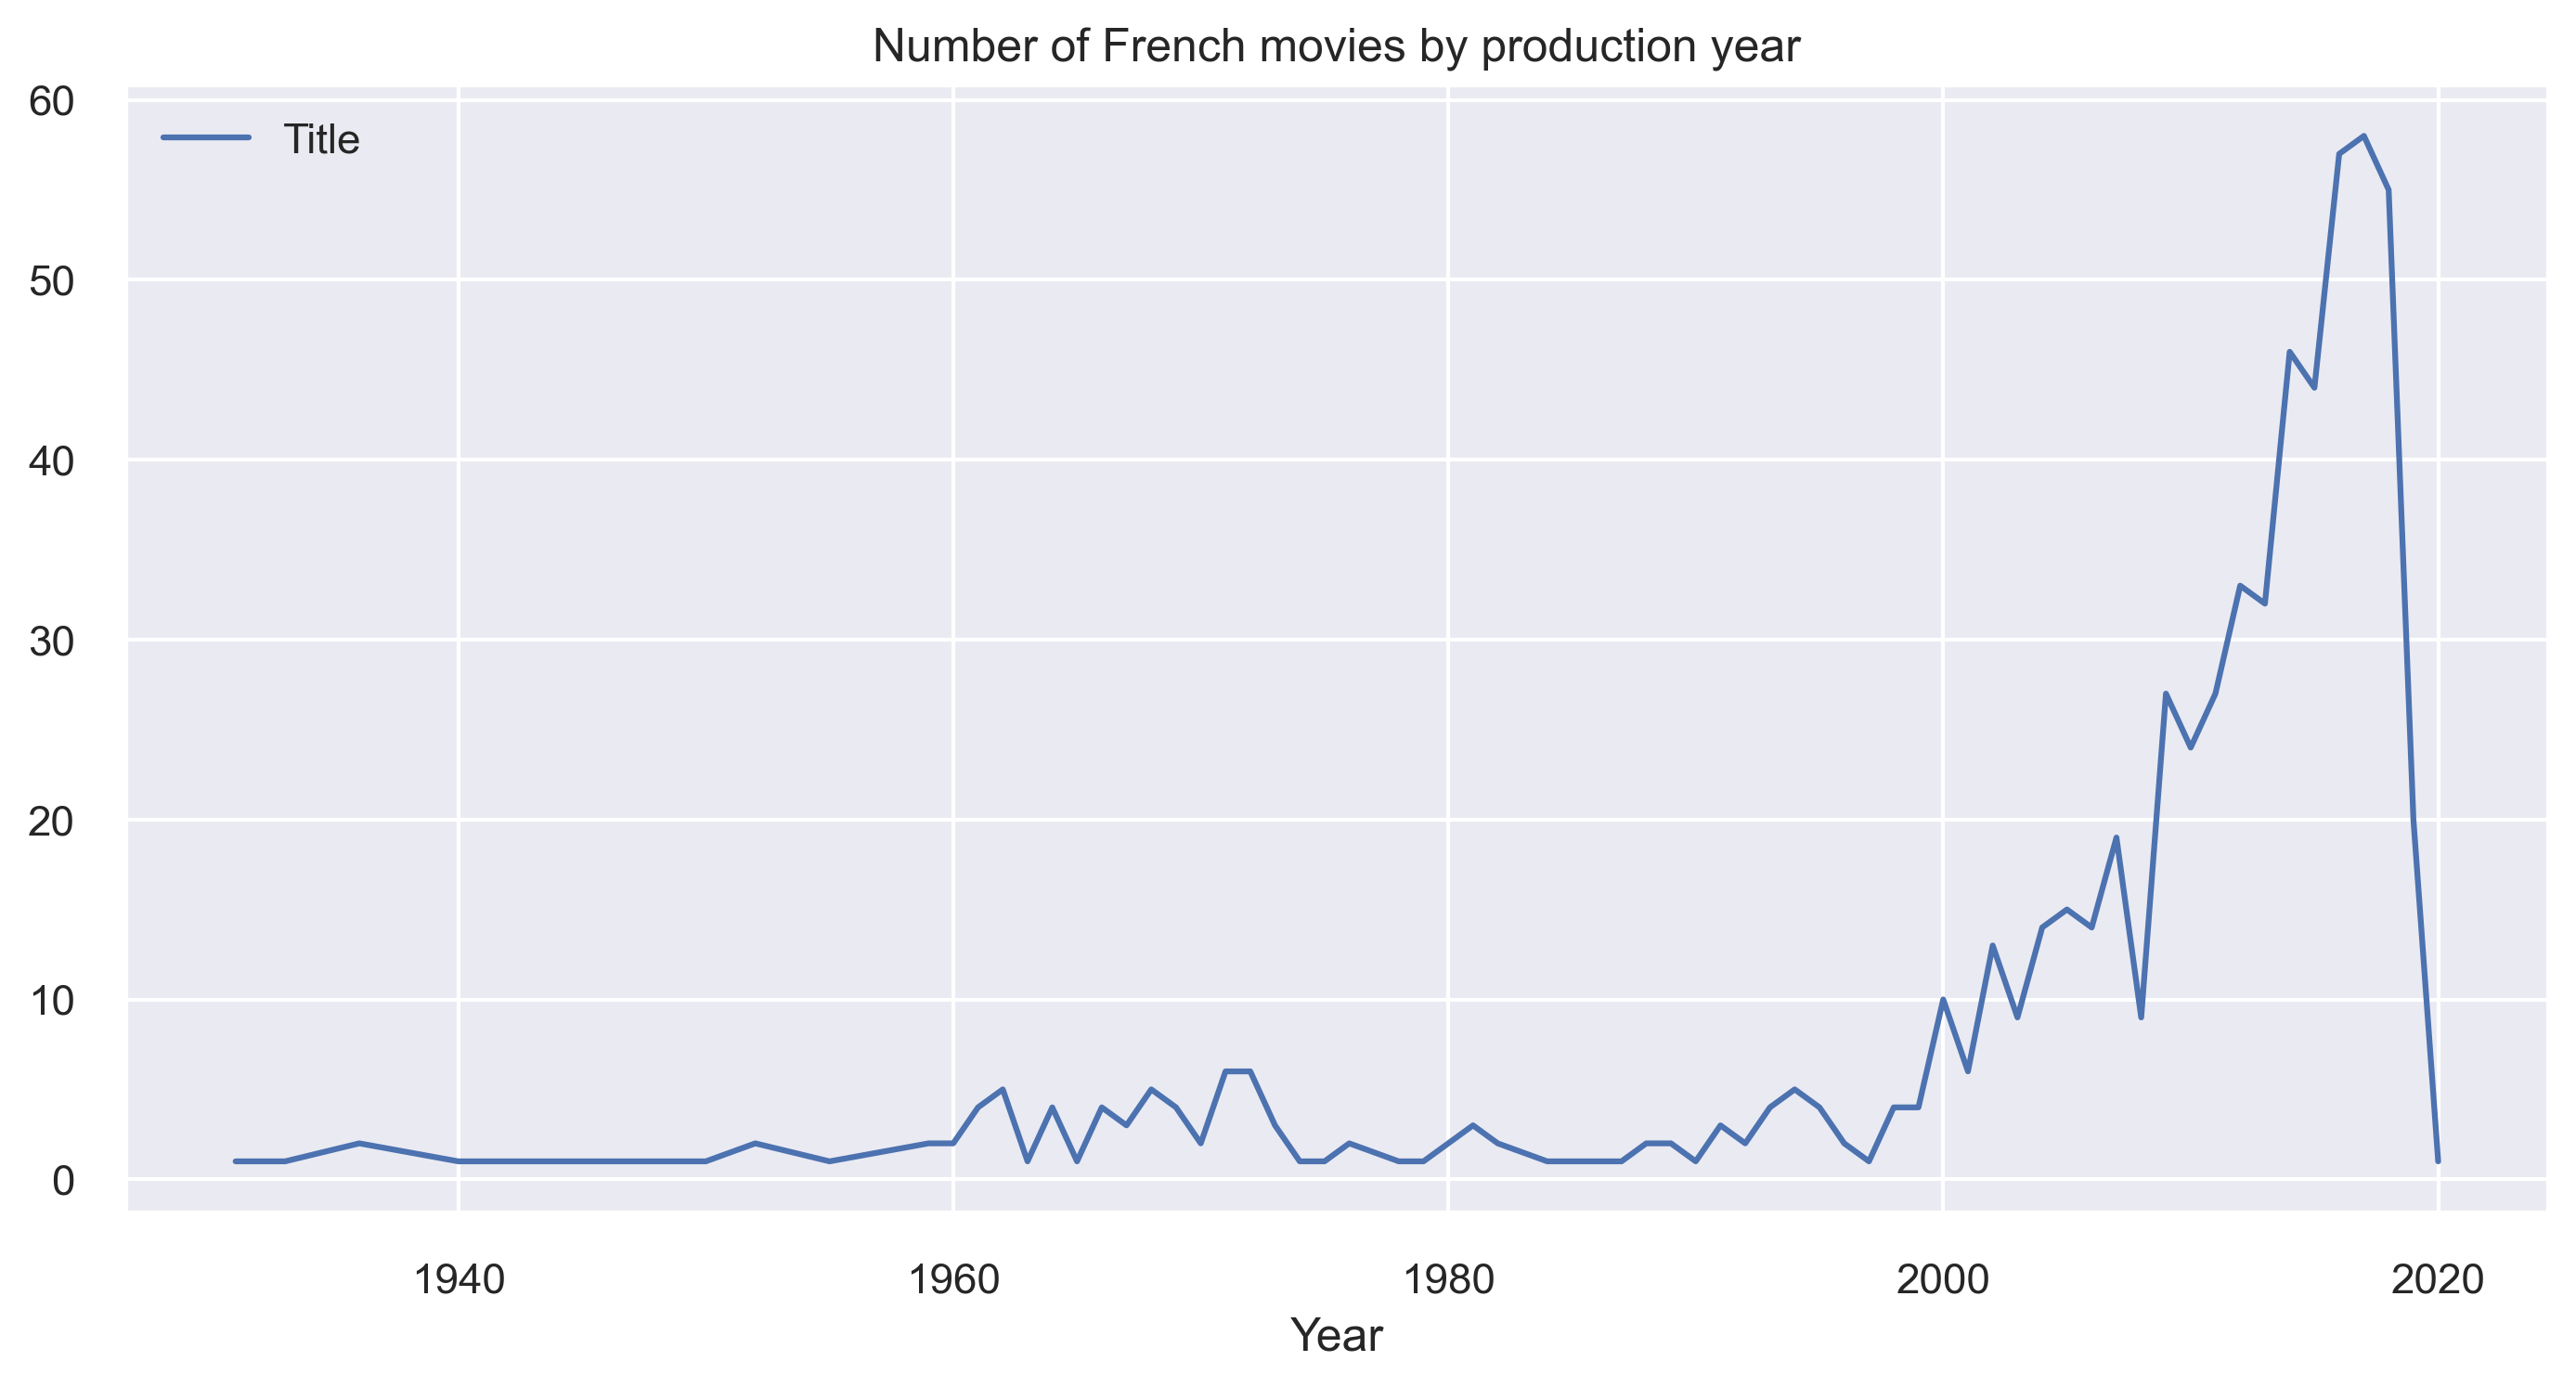

In [53]:
# plot the line trend of French movies 

french_prodcount.plot(figsize=(10,5), title='Number of French movies by production year', grid=True)

plt.show()

In [54]:
# top genres by the total number of movies
top_genre = (french_genre_sum.iloc[:, 9:-2] # get the genre columns only
              .sum() # sum them up
              .sort_values(ascending=False) # sort descending
              .head(10) # get the first 10
              .index.values # get the genre names
              )

top_genre

array(['Drama', 'Thriller', 'Comedy', 'Romance', 'Crime', 'Documentary',
       'Adventure', 'Mystery', 'History', 'Action'], dtype=object)

In [55]:
genre_groups = (french_genre_sum
                .groupby("Year")
                .sum()
               ).loc['2000': '2020', top_genre]

genre_groups.head(5)

Drama  Thriller  Comedy  Romance  Crime  Documentary  Adventure  \
Year                                                                    
2000      7         2       4        1      3            0          2   
2001      5         2       1        2      2            1          0   
2002      9         2       4        5      2            0          1   
2003      7         2       2        1      1            0          1   
2004     10         2       4        3      2            2          0   

      Mystery  History  Action  
Year                            
2000        1        1       0  
2001        0        0       1  
2002        1        0       2  
2003        1        0       1  
2004        1        0       0

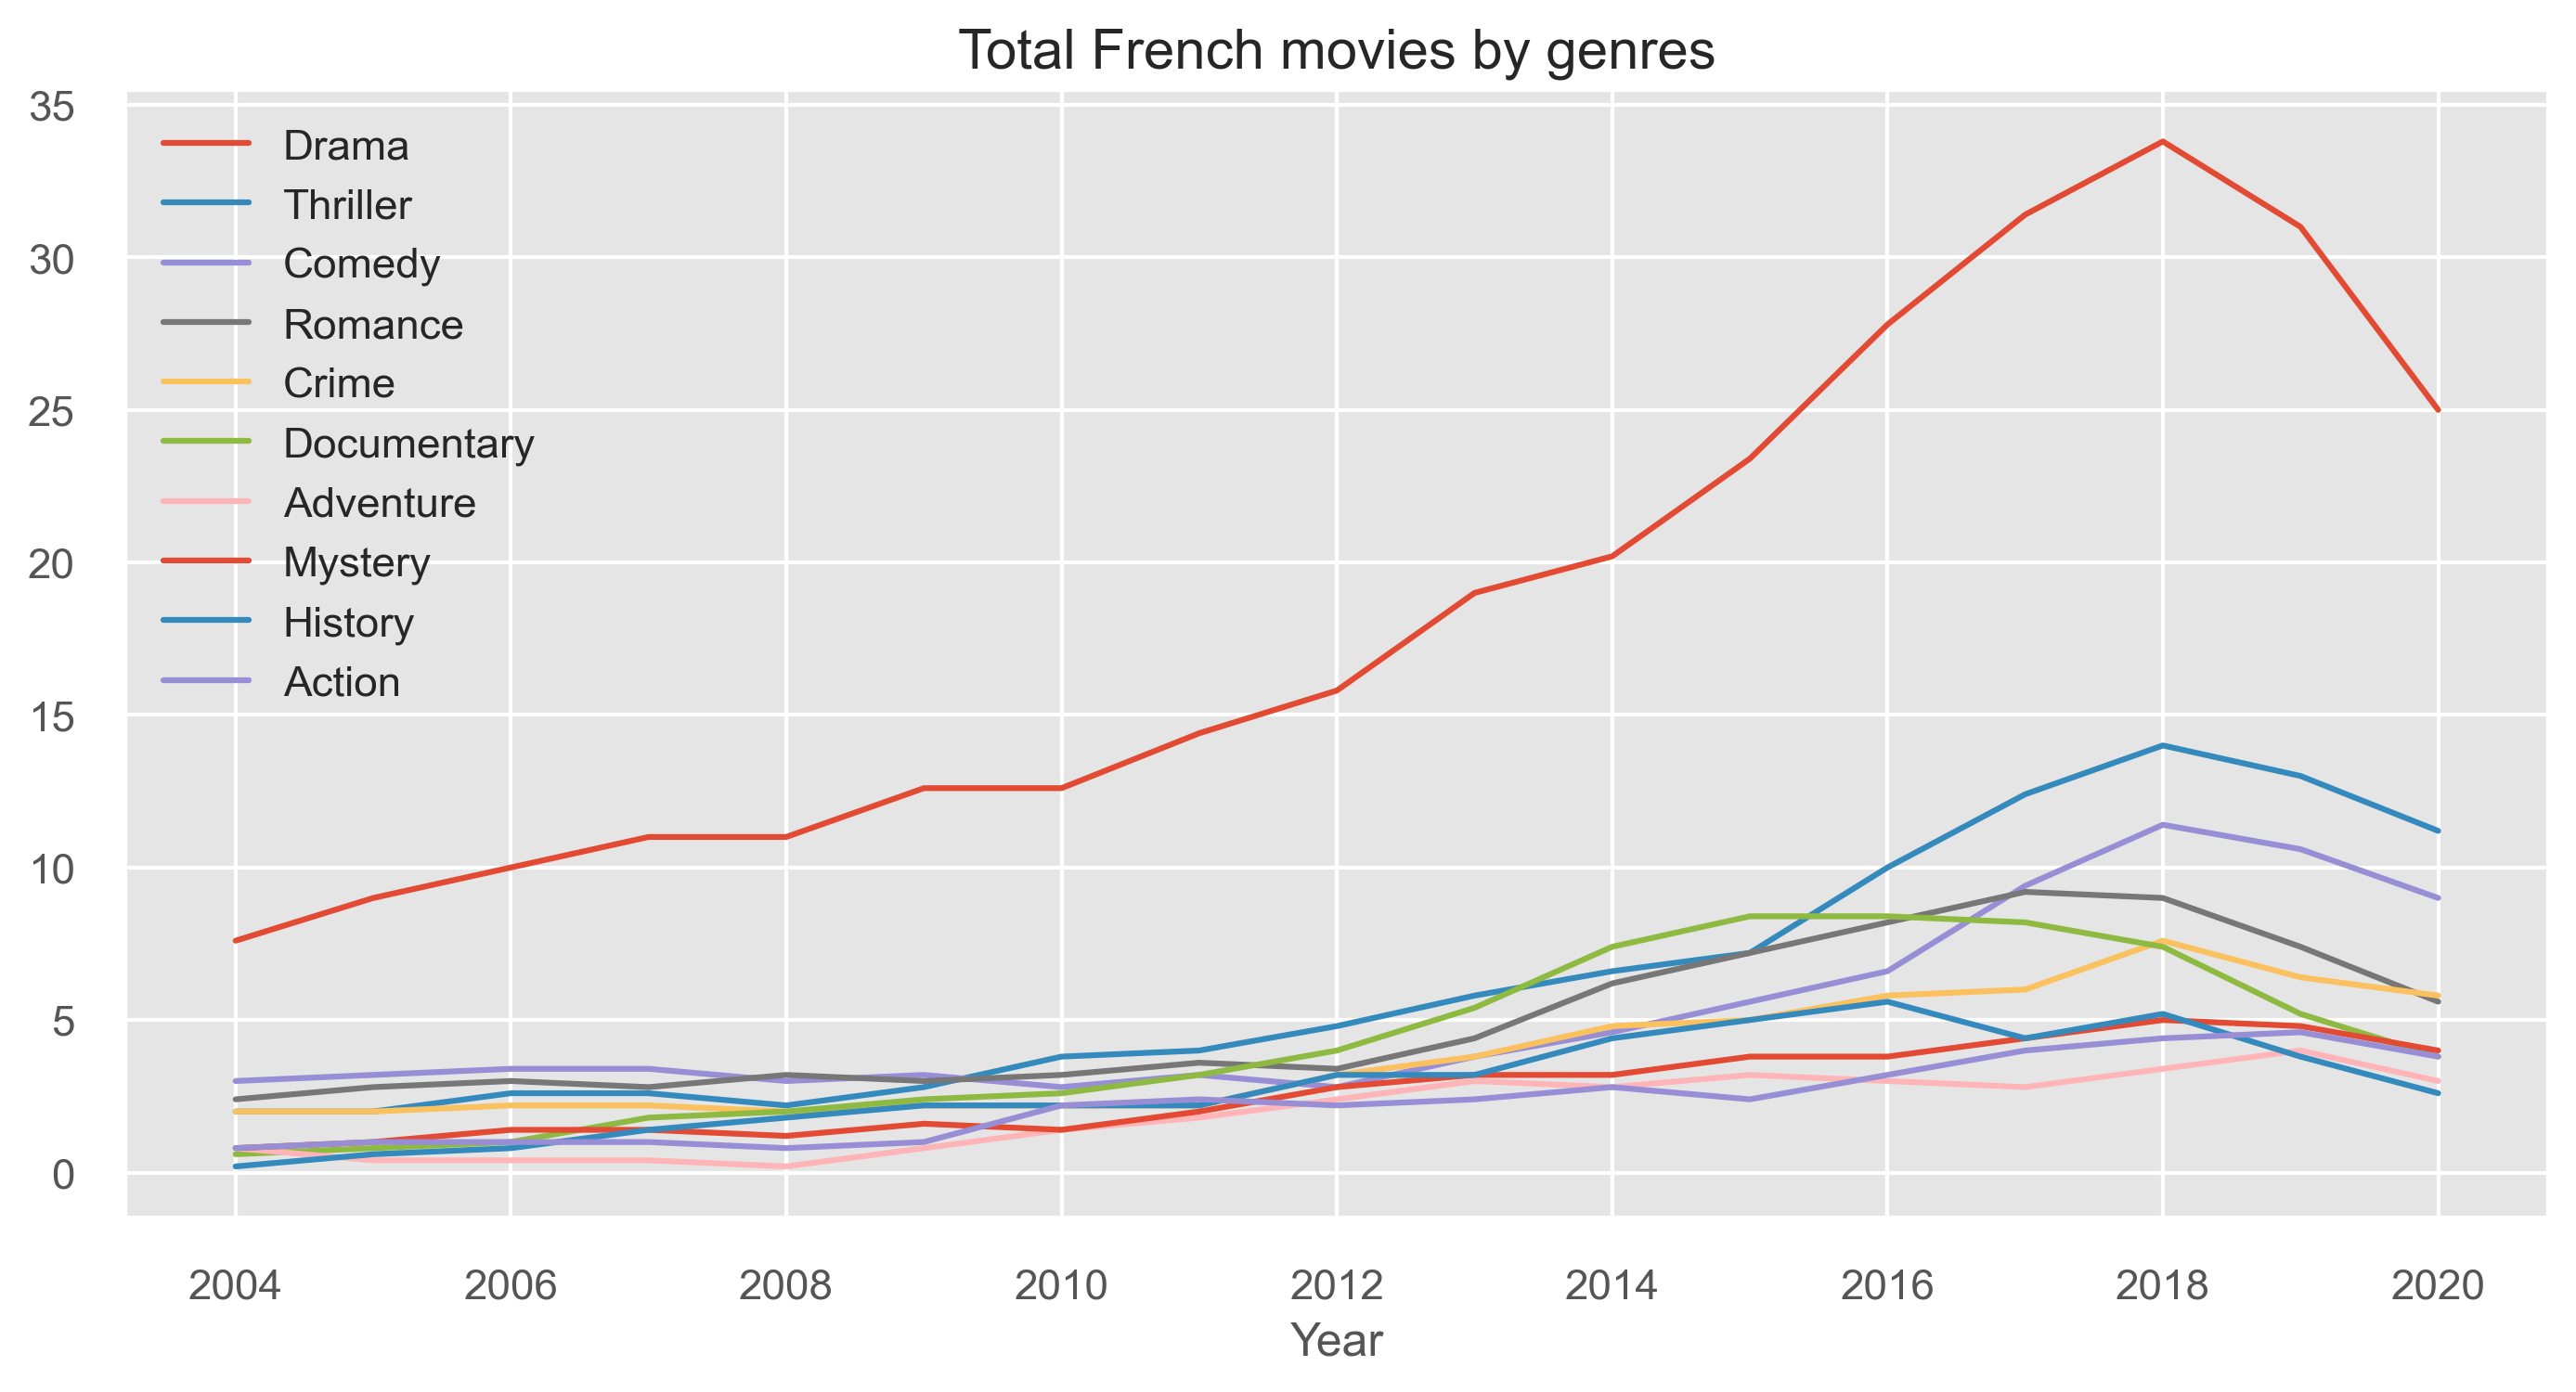

In [56]:
# Top six genres in movies made by France
plt.style.use('ggplot')
genre_groups.rolling(5).mean().plot(figsize=(10,5),
                                    title="Total French movies by genres")

plt.show()

In [57]:
# Least genres by the total number of movies
least_genre = (french_genre_sum.iloc[:, 9:-2] # get the genre columns only
              .sum() # sum them up
              .sort_values(ascending=False) # sort descending
              .tail(10) # get the first 10
              .index.values # get the genre names
              )

least_genre

array(['Sci-Fi', 'Western', 'Short', 'Musical', 'News', 'Sport',
       'Game-Show', 'Film-Noir', 'Reality-TV', 'Talk-Show'], dtype=object)

In [58]:
genre_groups_least = (french_genre_sum
                .groupby("Year")
                .sum()
               ).loc['2000': '2020', least_genre]

genre_groups_least.head(5)

Sci-Fi  Western  Short  Musical  News  Sport  Game-Show  Film-Noir  \
Year                                                                       
2000       0        0      0        0     0      0          0          0   
2001       0        0      0        0     0      0          0          0   
2002       0        0      1        0     0      0          0          0   
2003       1        0      0        0     0      0          0          0   
2004       0        0      0        0     0      0          0          0   

      Reality-TV  Talk-Show  
Year                         
2000           0          0  
2001           0          0  
2002           0          0  
2003           0          0  
2004           0          0

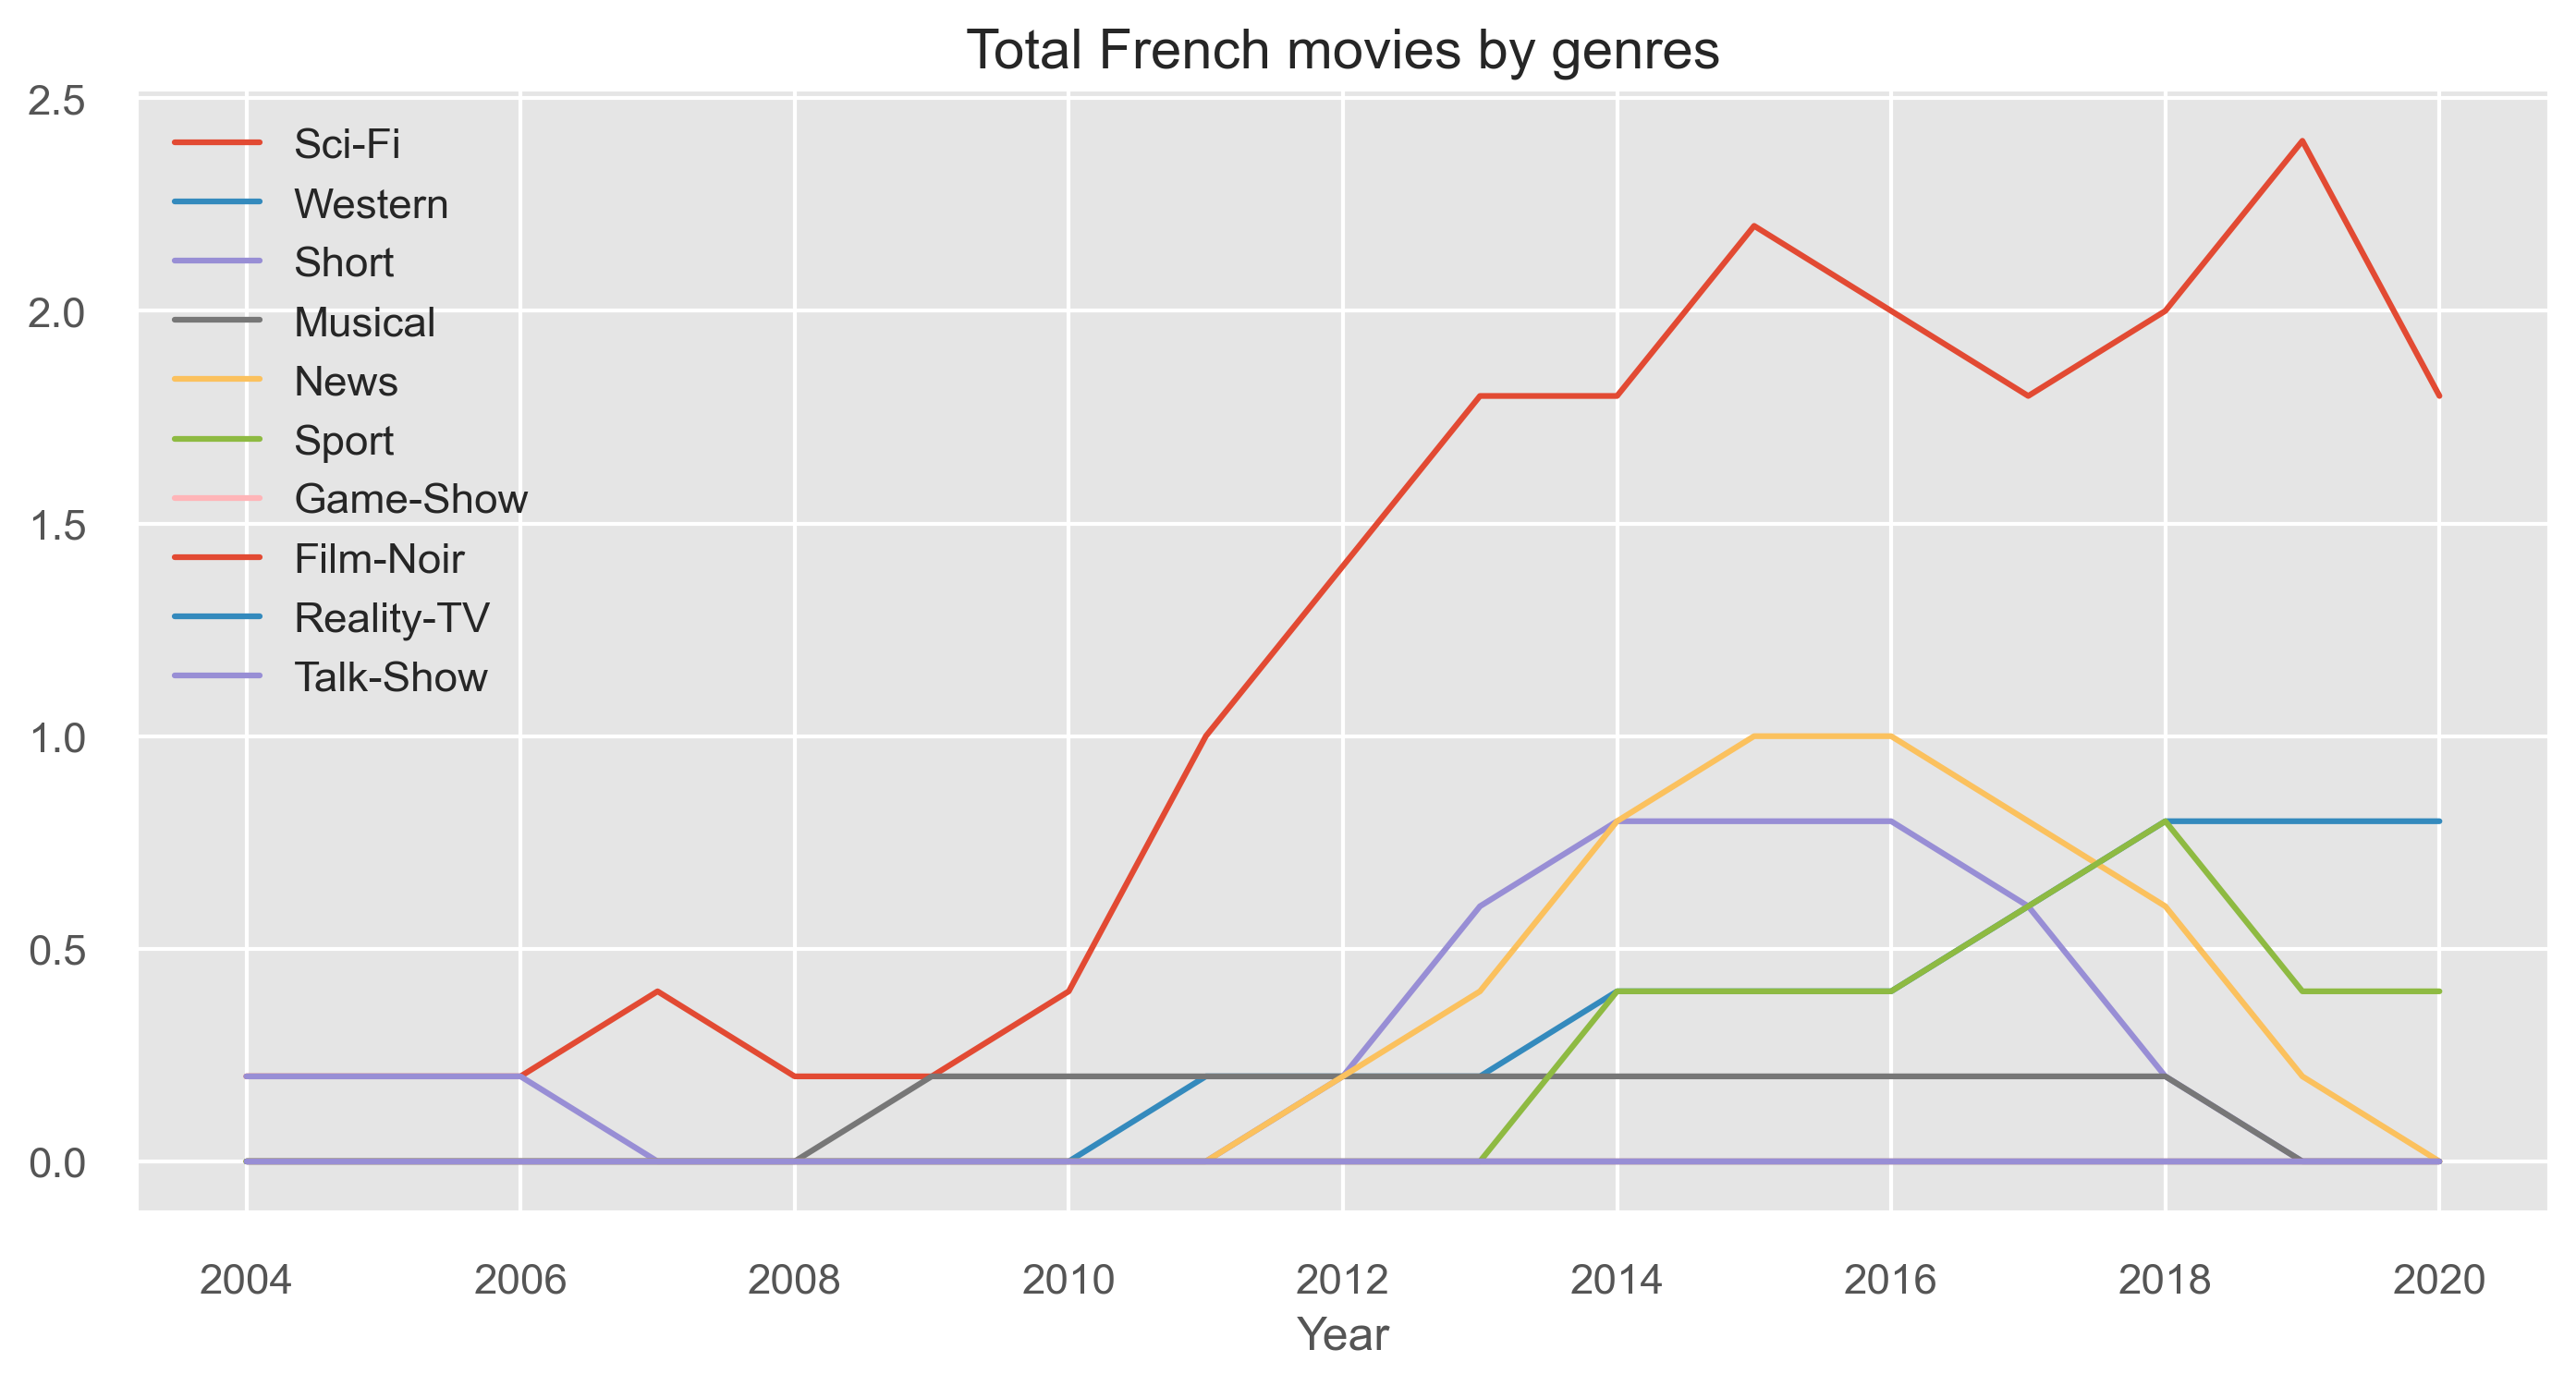

In [59]:
# Least 10 genres in movies made by France
plt.style.use('ggplot')
genre_groups_least.rolling(5).mean().plot(figsize=(10,5),
                                    title="Total French movies by genres")

plt.show()

##### Relationship between runtime and ratings

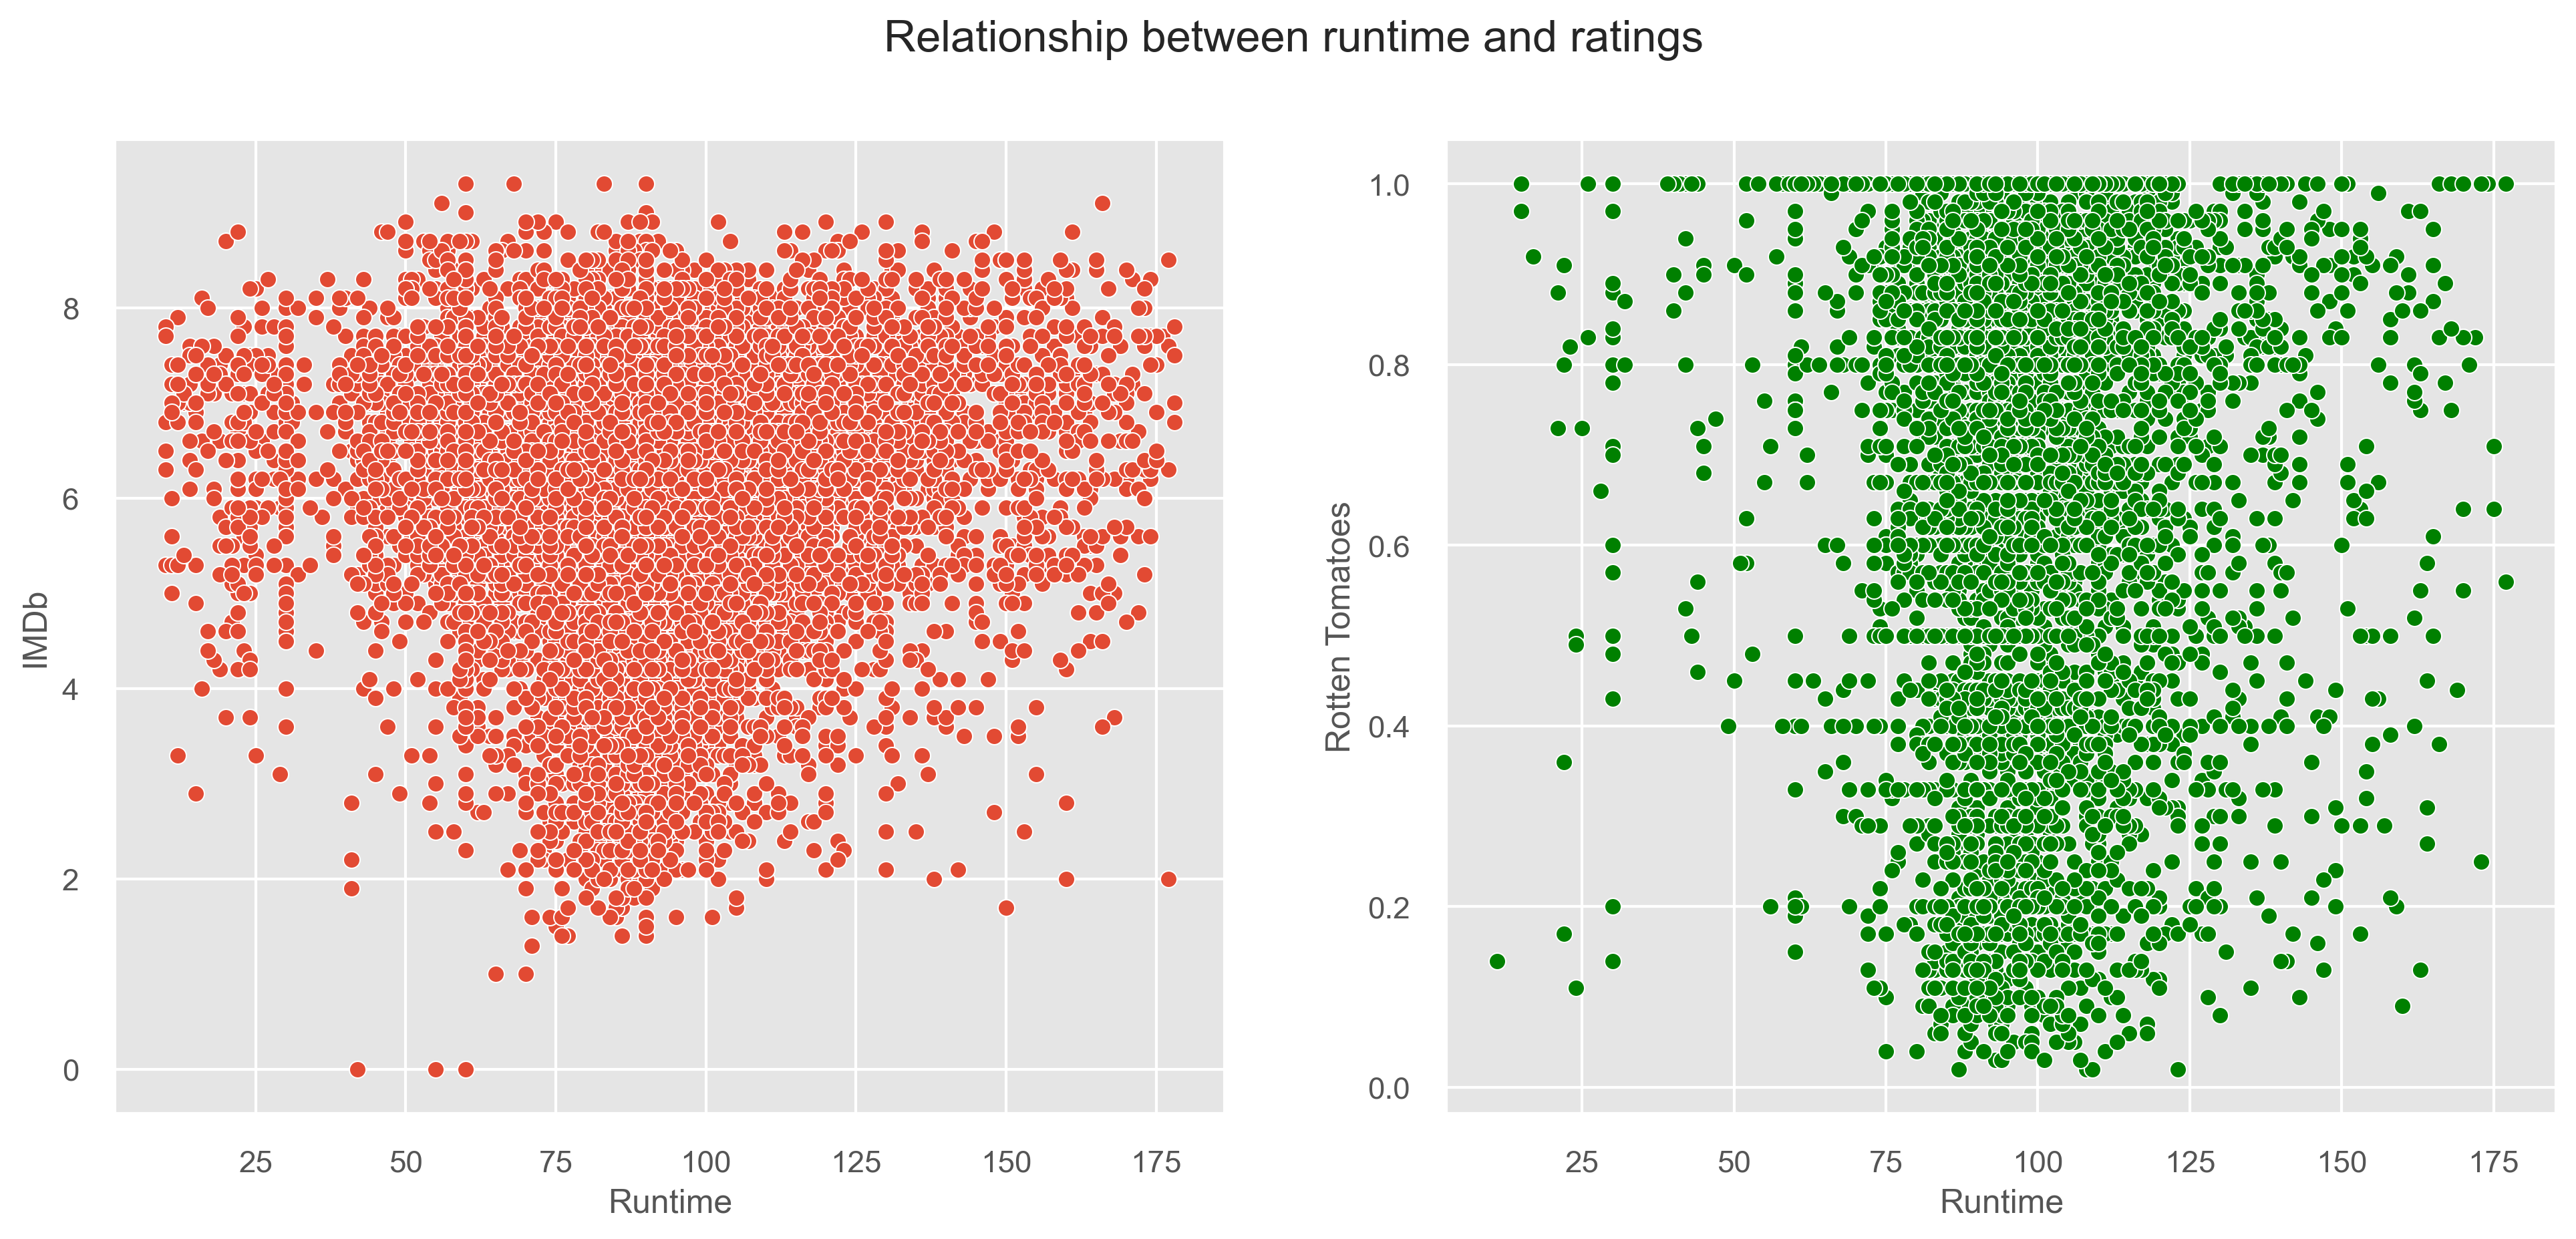

In [60]:
fig,(a1, a2) = plt.subplots(1,2)
fig.set_size_inches(14, 6)

fig.suptitle('Relationship between runtime and ratings', size=16)

sns.scatterplot(ax=a1, data=df, x='Runtime', y='IMDb')

sns.scatterplot(ax=a2, data=df, x='Runtime', y='Rotten Tomatoes', color='green')

plt.show()

<font color='red'> There is not a clear relationship between runtime and rating scores including both IMDb and Rotten tomatoes

##### Create an interactive scatter plot of  IMDb and Rotten Tomatoes scores

In [61]:
from bokeh.plotting import figure, output_notebook, show
output_notebook()

p1 = figure(plot_width=400, plot_height=400)
p1.circle("IMDb", "Rotten Tomatoes", source=df)

show(p1)

Loading BokehJS ...